## Name: Shivkumar G. Chauhan
### Roll No.: CS8A53
### Batch A-3
---
# Experiment - 6 : Explore data visualization techniques.

## imports

In [304]:
import pandas
import numpy
import warnings
import matplotlib.pyplot as pyplot
import seaborn
import scipy.stats
from sklearn import preprocessing
import networkx
import matplotlib_venn
import geopandas
import stemgraphic
from matplotlib_venn import venn2,venn3
import squarify
import plotly.express as express
import plotly.graph_objects as radar_graph_object

## Configurations

In [76]:
StandardScaler=preprocessing.StandardScaler(
    with_mean=False,
    with_std=True
)
Normalizer=preprocessing.Normalizer(
    norm='max'
)

In [143]:
# %matplotlib qt
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

hiding warnings

In [77]:
warnings.filterwarnings('ignore')

Initializing Functions

In [10]:
def normalDistributionGraphGenarator(
    data:numpy.array,
    *ExtraArguments
)->None:
    """Normalization graph plotter function

    Args:
        data (numpy.array): Any Array or DataFrame Column
    """
    pyplot.figure('Normal Distribution Graph')
    data=numpy.sort(data)
    pyplot.plot(data, scipy.stats.norm.pdf(
        data, 
        numpy.mean(data),
        numpy.std(data))
    )
    for data in ExtraArguments:
        data=numpy.sort(data)
        pyplot.plot(data, 
            scipy.stats.norm.pdf(
            data, 
            numpy.mean(data),
            numpy.std(data))
    )
    pyplot.xlabel('values')
    pyplot.ylabel("Normalized Values")

In [11]:
def generateClusters(data:pandas.DataFrame,column_name:str,number_of_clusters=5)->list:
    """ Function for getting clusters using Kmeans Method
        Only Numerical Column is allowed

    Args:
        data (pandas.DataFrame): DataFrame Copy
        column_name (str): Specific Column Name
        number_of_clusters (int, optional): number of required clusters . Defaults to 5.

    Returns:
        list: list of DataFrames
    """
    Samples=[]
    column_data=data[column_name]
    cluster_centers,_=kmeans(
        column_data.to_numpy(),
        k_or_guess=number_of_clusters
    )
    cluster_indexes,_ = vq(
        column_data.to_numpy(),
        cluster_centers
    )
    data["cluster_value"]=cluster_indexes
    for i in range(number_of_clusters):
        Samples.append(
            data[data["cluster_value"]==i].sort_values(by=column_name,
                                                       ascending=False
    ).reset_index(
                drop=True
    ).drop(
        ['cluster_value'],axis=1)
    )
    data=data.drop(['cluster_value'],axis=1)
    return Samples

reading dataset

In [78]:
Raw_Data=pandas.read_csv("./Data/Raw_Data/owid-covid-data.csv",date_parser='date')

Sorting the Dataframe using total_cases column

selecting specific columns

In [79]:
Raw_Data=Raw_Data.sort_values(
    by="total_cases",
    ascending=False
).reset_index(drop=True)

In [80]:
Selected_Columns=['iso_code','date', 'continent', 'location', 'total_cases','new_cases', 'total_deaths', 'new_deaths','population','life_expectancy']

Location Specific Data

In [81]:
location="World"

In [82]:
Location_Specific_Data=Raw_Data[
    Raw_Data['location']==location
]

Recently Updated Data

In [83]:
recent_date=Raw_Data['date'][0]
Recent_Data=Raw_Data[Raw_Data['date']==recent_date]

In [12]:
def PreprocessTheCovidData(Main_Data:pandas.DataFrame,Selected_columns:list,isCumulative=False)->pandas.DataFrame:
    """Final Function for Whole Data Processing for Covid Data

    Args:
        Main_Data (pandas.DataFrame): Initial Raw Data
        Selected_columns (list): list of columns that to bet selected

    Returns:
        pandas.DataFrame: Preprocessed Data
    """
    Main_Data=Main_Data[Selected_Columns]
    if isCumulative:
        for index in Main_Data['location'].value_counts().index:
            if len(Main_Data[Main_Data['location']==index]['total_cases'].unique())<2:
                Main_Data=Main_Data[Main_Data['location']!=index]
    for index in Main_Data[Main_Data['continent'].isnull()==True]['location'].value_counts().index:
        if index.find("income")!=-1:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":"Income Based"})
        elif index.find("Europe")!=-1:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":"Europe"})
        elif index.find("International")!=-1 or index.find("World")!=-1:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":"World"})
        else:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":index})
    for index in Main_Data[Main_Data['life_expectancy'].isnull()==False]['continent'].value_counts().index:
        Main_Data[Main_Data['continent']==index]=Main_Data[Main_Data['continent']==index].fillna(value={"life_expectancy":Main_Data[Main_Data['continent']==index]['life_expectancy'].mean()})
    Main_Data=Main_Data.fillna(value={"life_expectancy":Main_Data['life_expectancy'].mean()})
    Main_Data['population']=Main_Data['population'].fillna(Main_Data[Main_Data['location']=='International']['total_cases'].max())
    Main_Data[['new_cases','new_deaths']]=Main_Data[['new_cases','new_deaths']].fillna(0)
    for index in Main_Data['location'].value_counts().index:
        Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(0,limit=1)
        Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(method='ffill')
    return Main_Data

# Data Exploration

## Raw Data

printing Checking of Raw dataset

In [20]:
Raw_Data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,OWID_WRL,NaN,World,2023-02-12,672789992.0,76746.0,168124.000,6853702.0,369.0,1247.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
1,OWID_WRL,NaN,World,2023-02-11,672713246.0,131483.0,169768.429,6853333.0,622.0,1268.857,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
2,OWID_WRL,NaN,World,2023-02-10,672581763.0,142758.0,165649.000,6852711.0,1422.0,1733.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
3,OWID_WRL,NaN,World,2023-02-09,672440247.0,257000.0,179259.857,6851332.0,2259.0,1851.000,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
4,OWID_WRL,NaN,World,2023-02-08,672183247.0,228269.0,179518.429,6849409.0,1896.0,1908.429,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257010,OWID_WLS,Europe,Wales,2023-02-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.170000e+06,NaN,NaN,NaN,NaN
257011,OWID_WLS,Europe,Wales,2023-02-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.170000e+06,NaN,NaN,NaN,NaN
257012,OWID_WLS,Europe,Wales,2023-02-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.170000e+06,NaN,NaN,NaN,NaN
257013,OWID_WLS,Europe,Wales,2023-02-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.170000e+06,NaN,NaN,NaN,NaN


## Location Specific Data

Printing Location Specific Data

In [21]:
Location_Specific_Data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,OWID_WRL,NaN,World,2023-02-12,672789992.0,76746.0,168124.000,6853702.0,369.0,1247.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
1,OWID_WRL,NaN,World,2023-02-11,672713246.0,131483.0,169768.429,6853333.0,622.0,1268.857,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
2,OWID_WRL,NaN,World,2023-02-10,672581763.0,142758.0,165649.000,6852711.0,1422.0,1733.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
3,OWID_WRL,NaN,World,2023-02-09,672440247.0,257000.0,179259.857,6851332.0,2259.0,1851.000,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
4,OWID_WRL,NaN,World,2023-02-08,672183247.0,228269.0,179518.429,6849409.0,1896.0,1908.429,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197867,OWID_WRL,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
202240,OWID_WRL,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
206130,OWID_WRL,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
210308,OWID_WRL,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


## Recently Updated Data

Printing Recently Updated Data

In [22]:
Recent_Data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,OWID_WRL,NaN,World,2023-02-12,672789992.0,76746.0,168124.000,6853702.0,369.0,1247.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
355,OWID_HIC,NaN,High income,2023-02-12,428947809.0,57908.0,140305.143,2855457.0,257.0,1065.857,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
811,OWID_EUR,NaN,Europe,2023-02-12,247078476.0,21757.0,45771.714,2027034.0,51.0,384.714,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
1134,OWID_ASI,NaN,Asia,2023-02-12,209906439.0,38544.0,65275.571,1619549.0,248.0,286.286,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
1440,OWID_EUN,NaN,European Union,2023-02-12,183299960.0,8336.0,30078.000,1210060.0,14.0,280.571,...,NaN,NaN,NaN,NaN,NaN,4.501468e+08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202413,MSR,North America,Montserrat,2023-02-12,1403.0,0.0,0.000,8.0,0.0,0.000,...,NaN,NaN,NaN,74.16,NaN,4.413000e+03,NaN,NaN,NaN,NaN
208578,OWID_INT,NaN,International,2023-02-12,721.0,0.0,0.000,15.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228398,VAT,Europe,Vatican,2023-02-12,29.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,75.12,NaN,8.080000e+02,NaN,NaN,NaN,NaN
242240,PRK,Asia,North Korea,2023-02-12,1.0,0.0,0.000,6.0,0.0,0.000,...,NaN,NaN,13.200,72.27,NaN,2.606942e+07,NaN,NaN,NaN,NaN


# Data Preprocessing

In [314]:
Main_Data=PreprocessTheCovidData(
    Location_Specific_Data.copy().sort_values(by='date',ascending=True).reset_index(drop=True),
    Selected_Columns
)

In [24]:
Main_Data

,iso_code,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,population,life_expectancy
0,OWID_WRL,2023-02-12,World,World,672789992.0,76746.0,6853702.0,369.0,7.975105e+09,72.580000
1,SWZ,2023-02-12,Africa,Eswatini,74158.0,15.0,1423.0,0.0,1.201680e+06,60.190000
2,GUY,2023-02-12,South America,Guyana,73032.0,0.0,1297.0,0.0,8.087270e+05,69.910000
3,BLZ,2023-02-12,North America,Belize,70697.0,0.0,688.0,0.0,4.052850e+05,74.620000
4,FJI,2023-02-12,Oceania,Fiji,68864.0,0.0,883.0,0.0,9.297690e+05,67.440000
...,...,...,...,...,...,...,...,...,...,...
227,PAN,2023-02-12,North America,Panama,1030214.0,0.0,8599.0,0.0,4.408582e+06,78.510000
228,MNG,2023-02-12,Asia,Mongolia,1007888.0,0.0,2136.0,0.0,3.398373e+06,69.870000
229,NPL,2023-02-12,Asia,Nepal,1001115.0,2.0,12020.0,0.0,3.054759e+07,70.780000
230,HRV,2023-02-12,Europe,Croatia,1268224.0,39.0,17923.0,2.0,4.030361e+06,78.490000


# Data Visualization

## Basic and Most used Graphs

### Normal Distribution Graphs Ploting

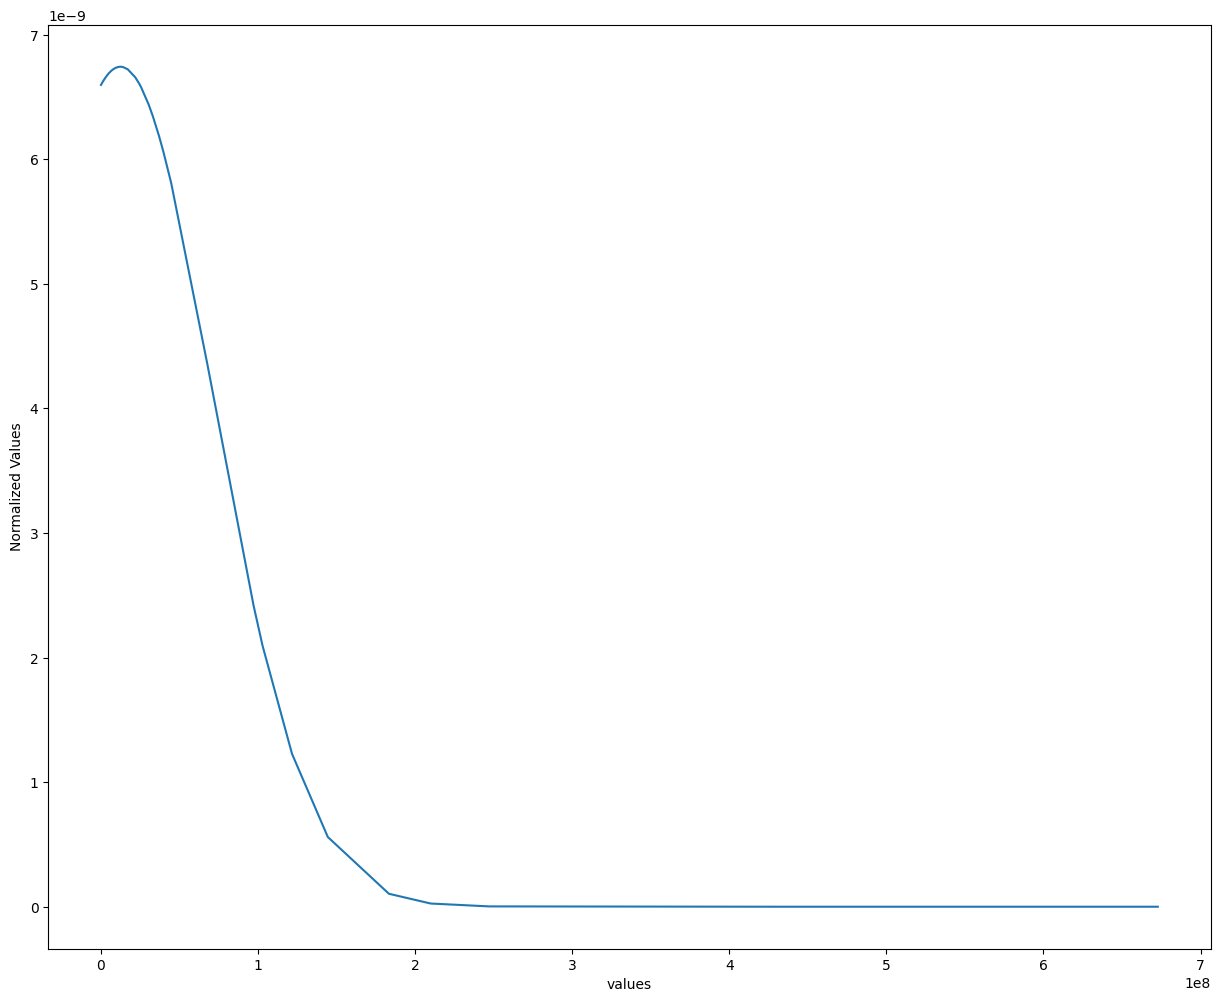

In [25]:
normalDistributionGraphGenarator(Main_Data['total_cases'])

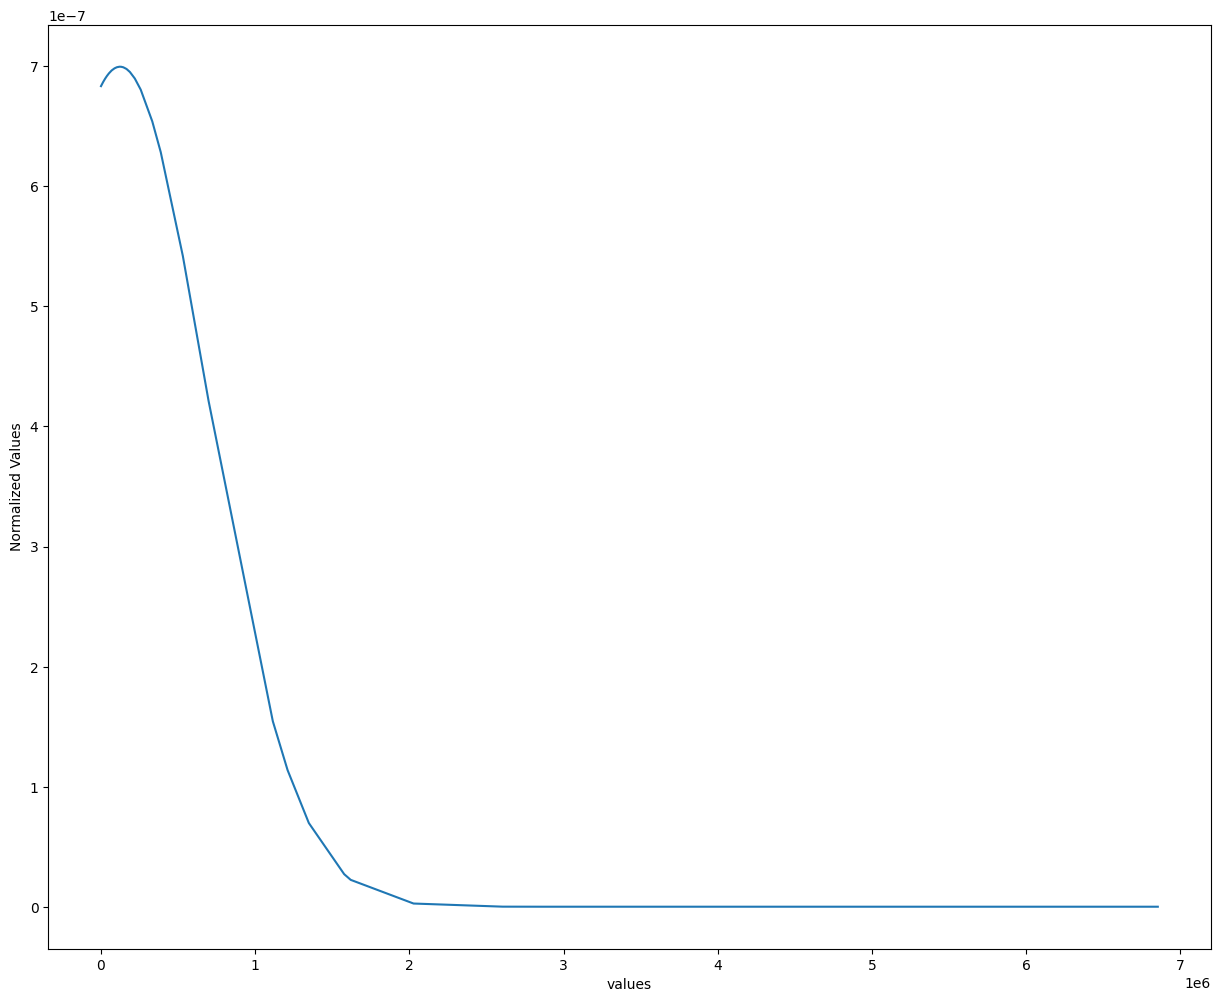

In [26]:
normalDistributionGraphGenarator(Main_Data['total_deaths'])

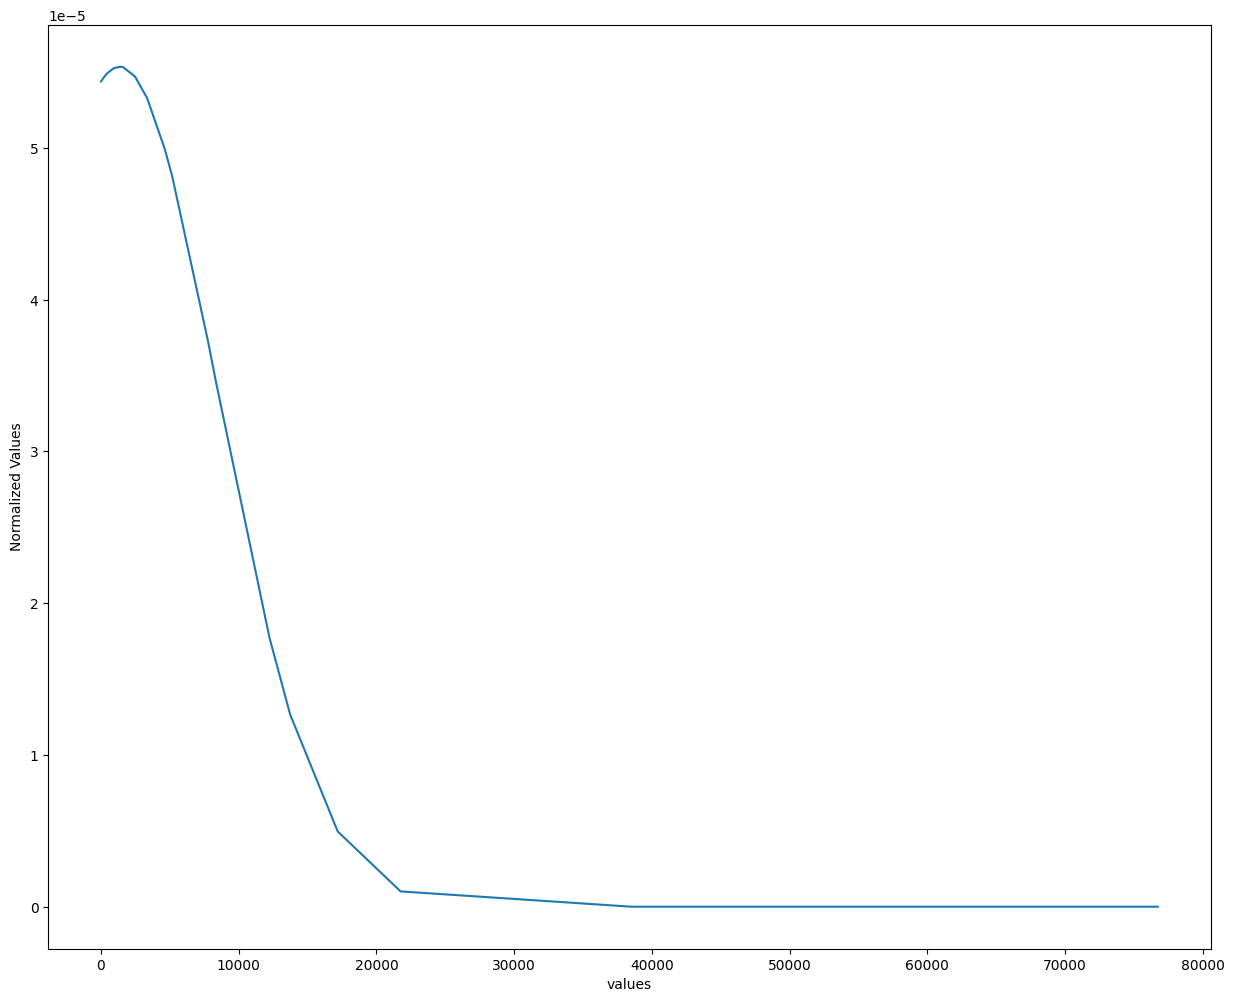

In [27]:
normalDistributionGraphGenarator(Main_Data['new_cases'])

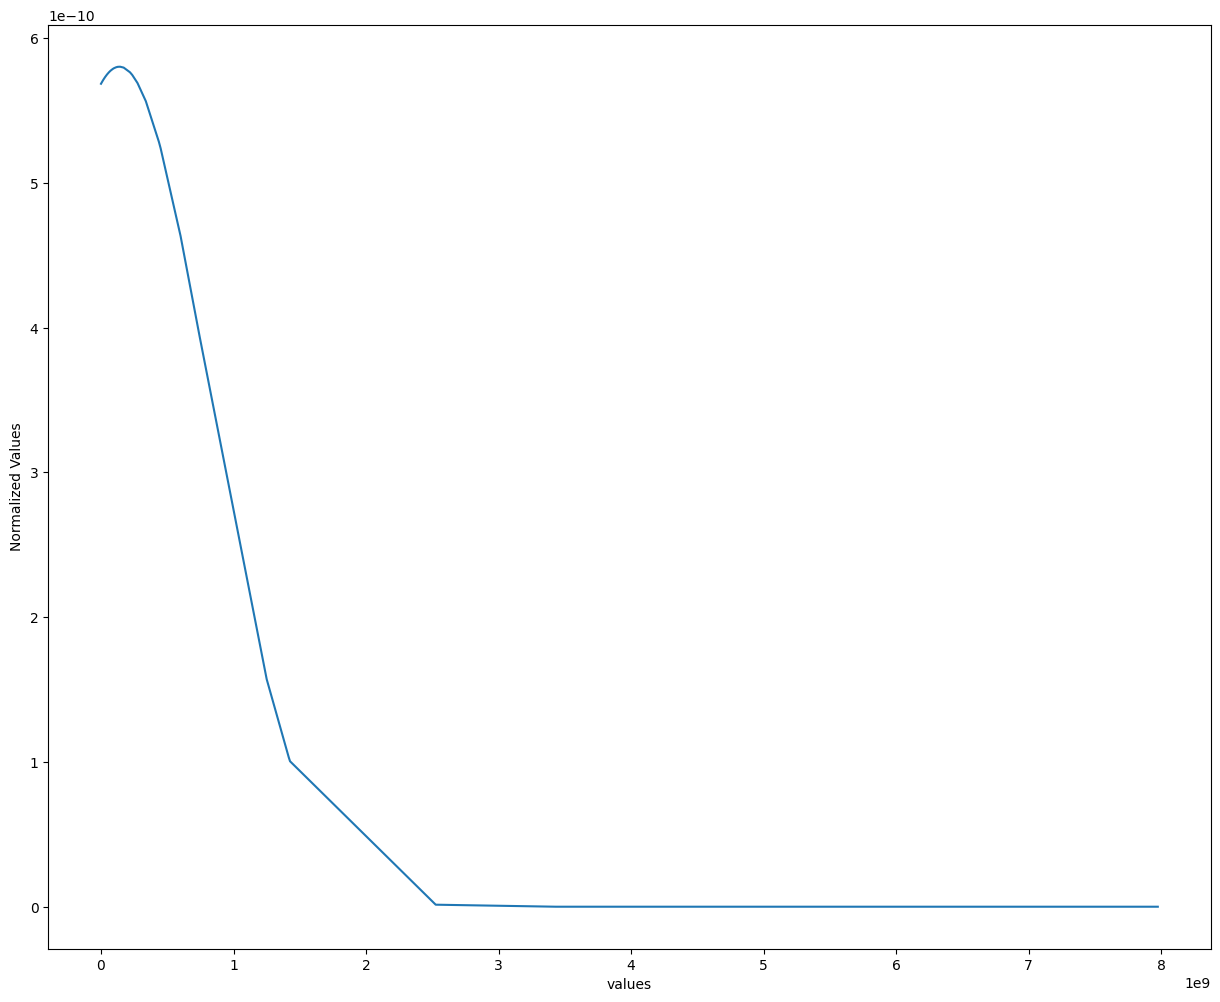

In [28]:
normalDistributionGraphGenarator(Main_Data['population'])

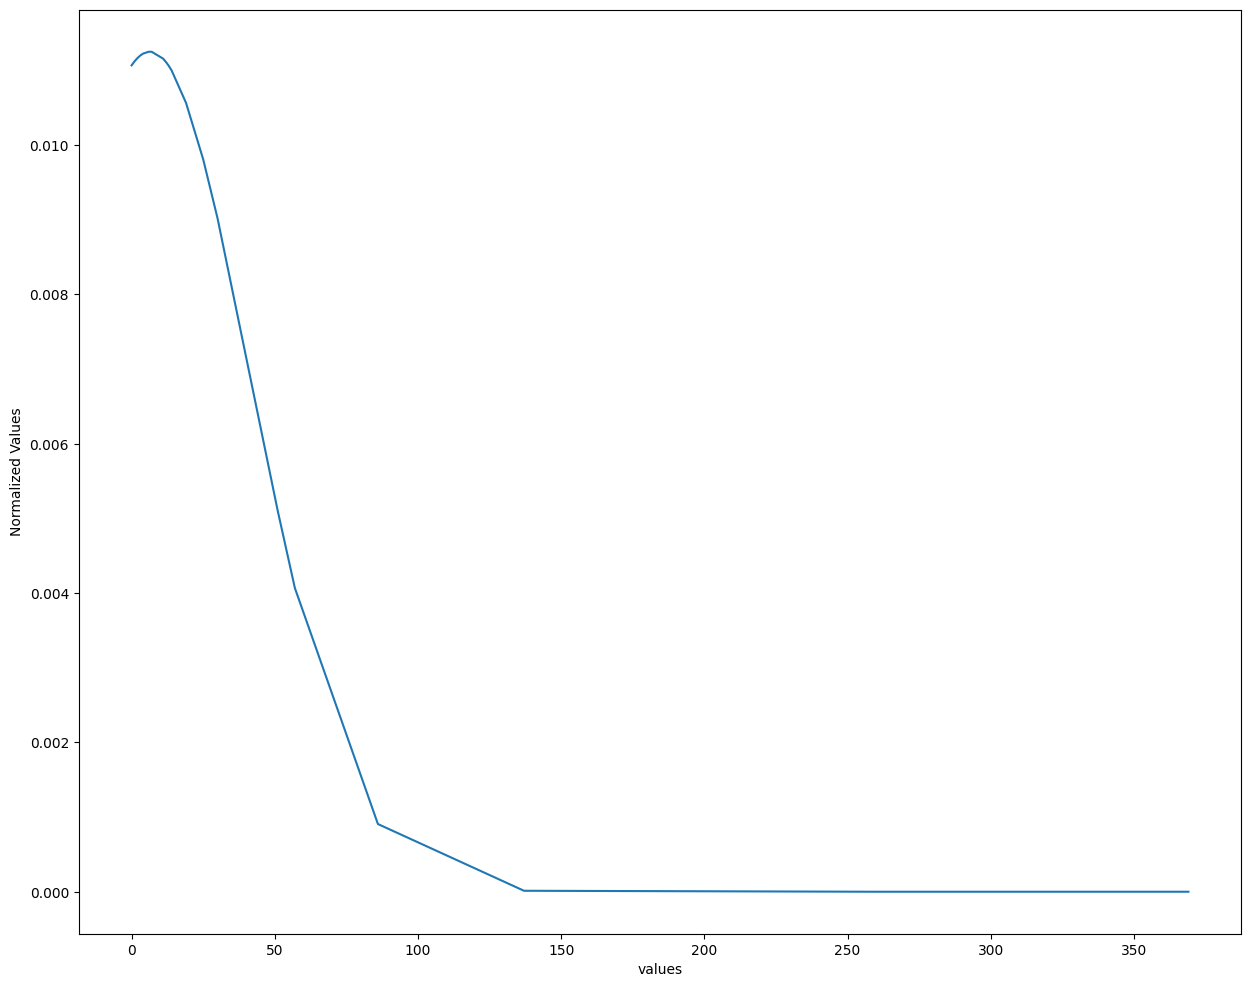

In [29]:
normalDistributionGraphGenarator(Main_Data['new_deaths'])

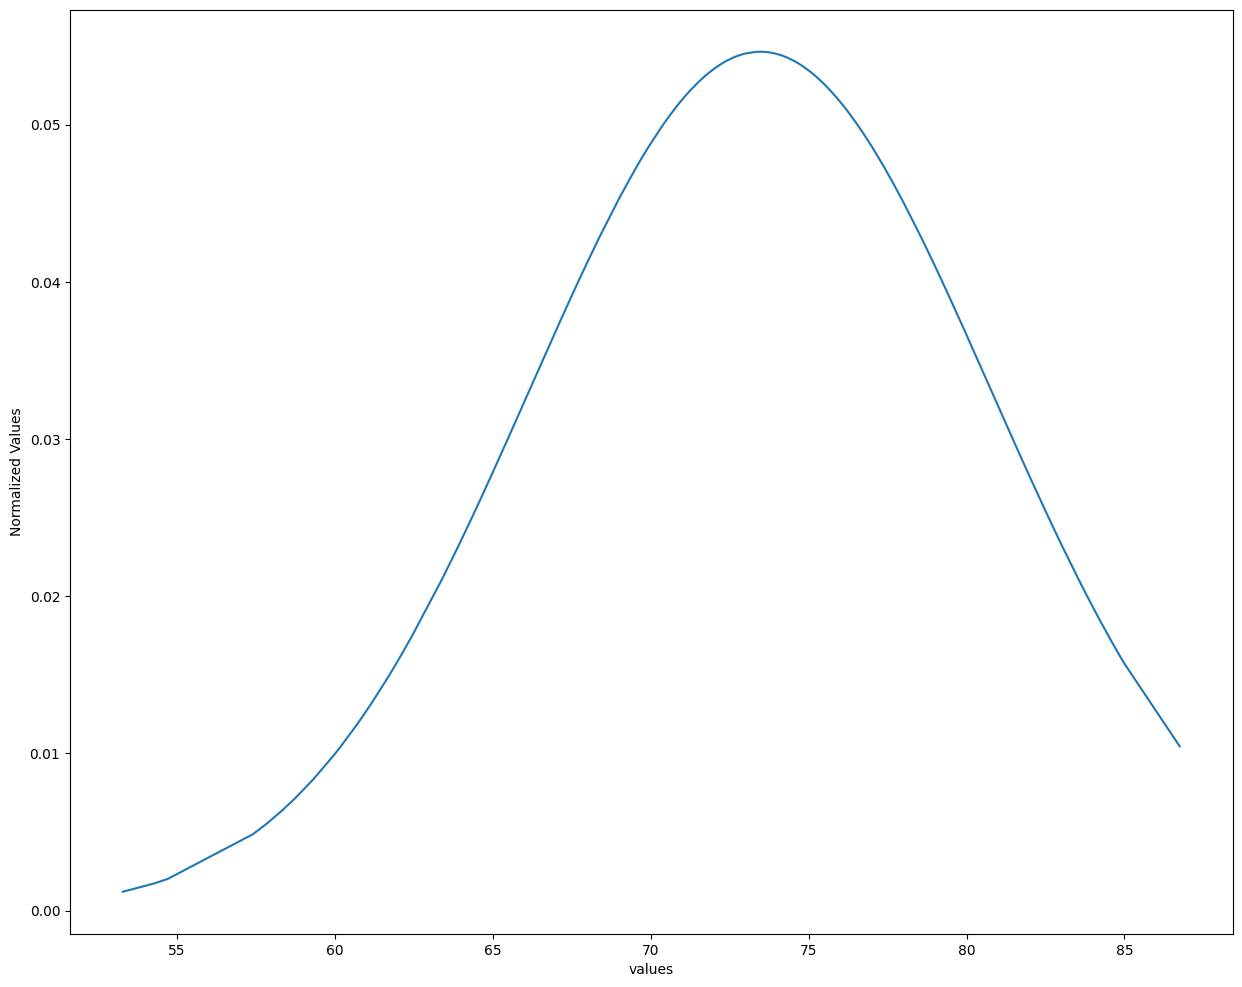

In [30]:
normalDistributionGraphGenarator(Main_Data['life_expectancy'])

### Line Graphs

<AxesSubplot: xlabel='date'>

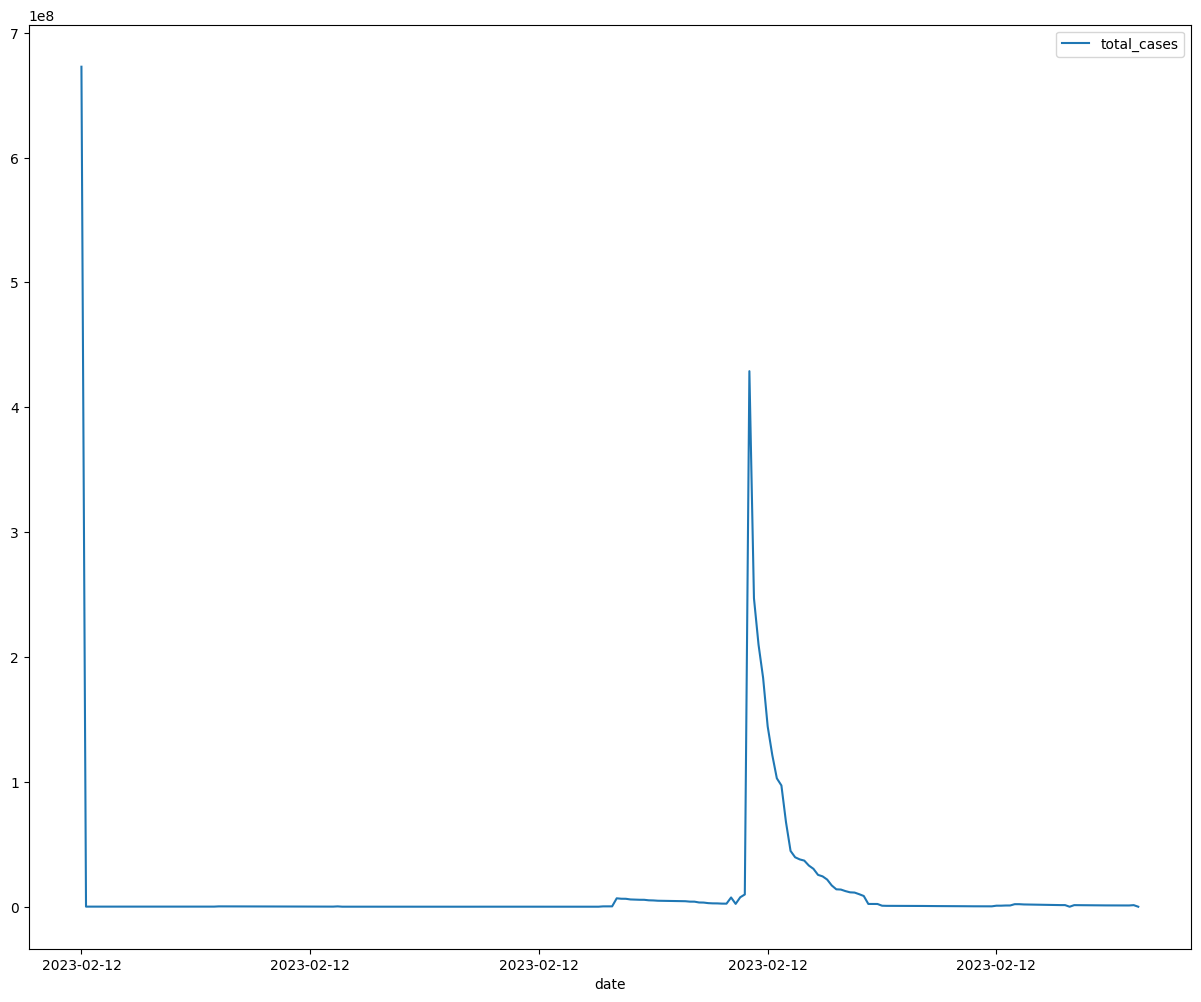

In [31]:
Main_Data.plot(x='date', y='total_cases')

<AxesSubplot: xlabel='date'>

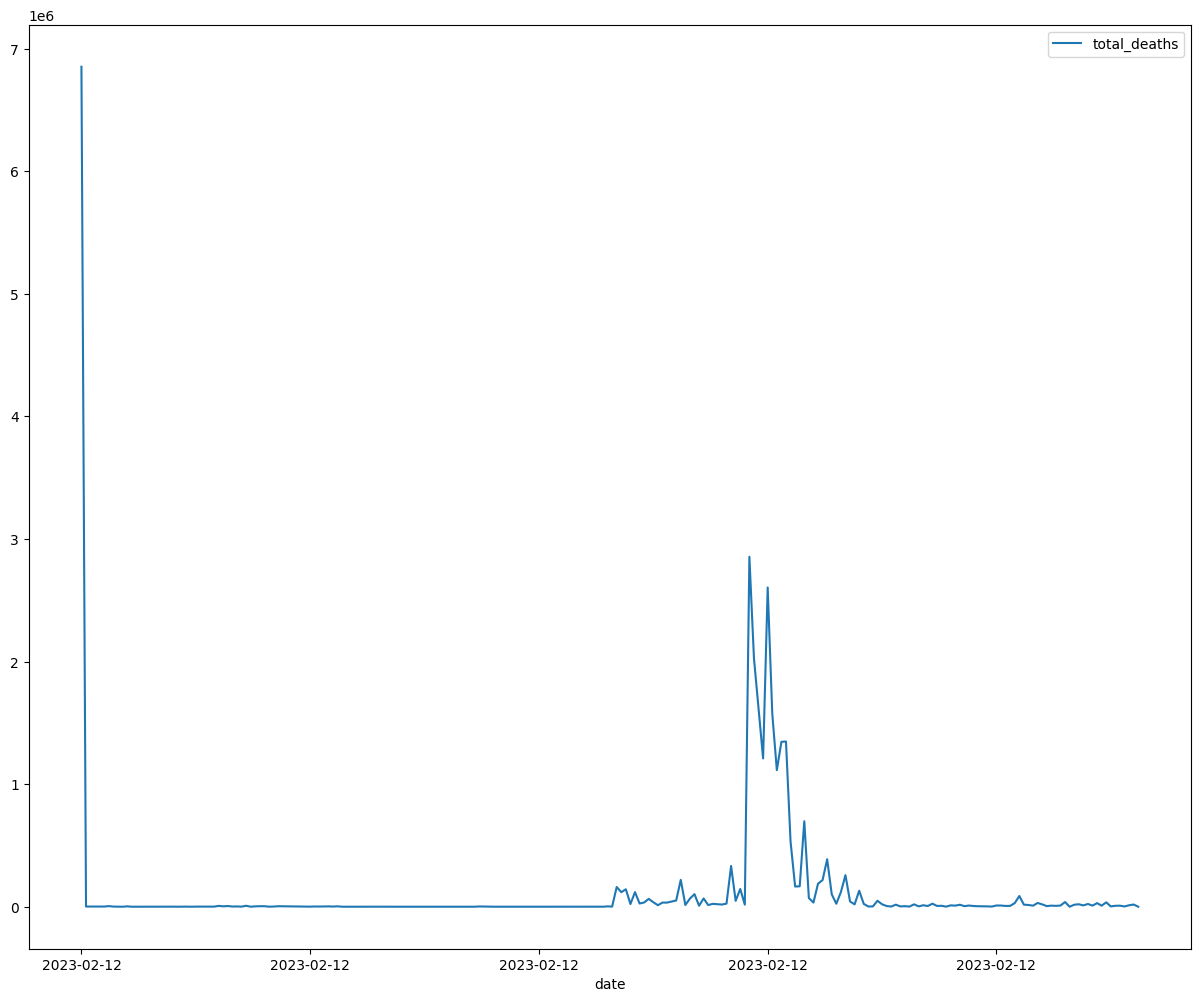

In [32]:
Main_Data.plot(x='date', y='total_deaths')

<AxesSubplot: xlabel='date'>

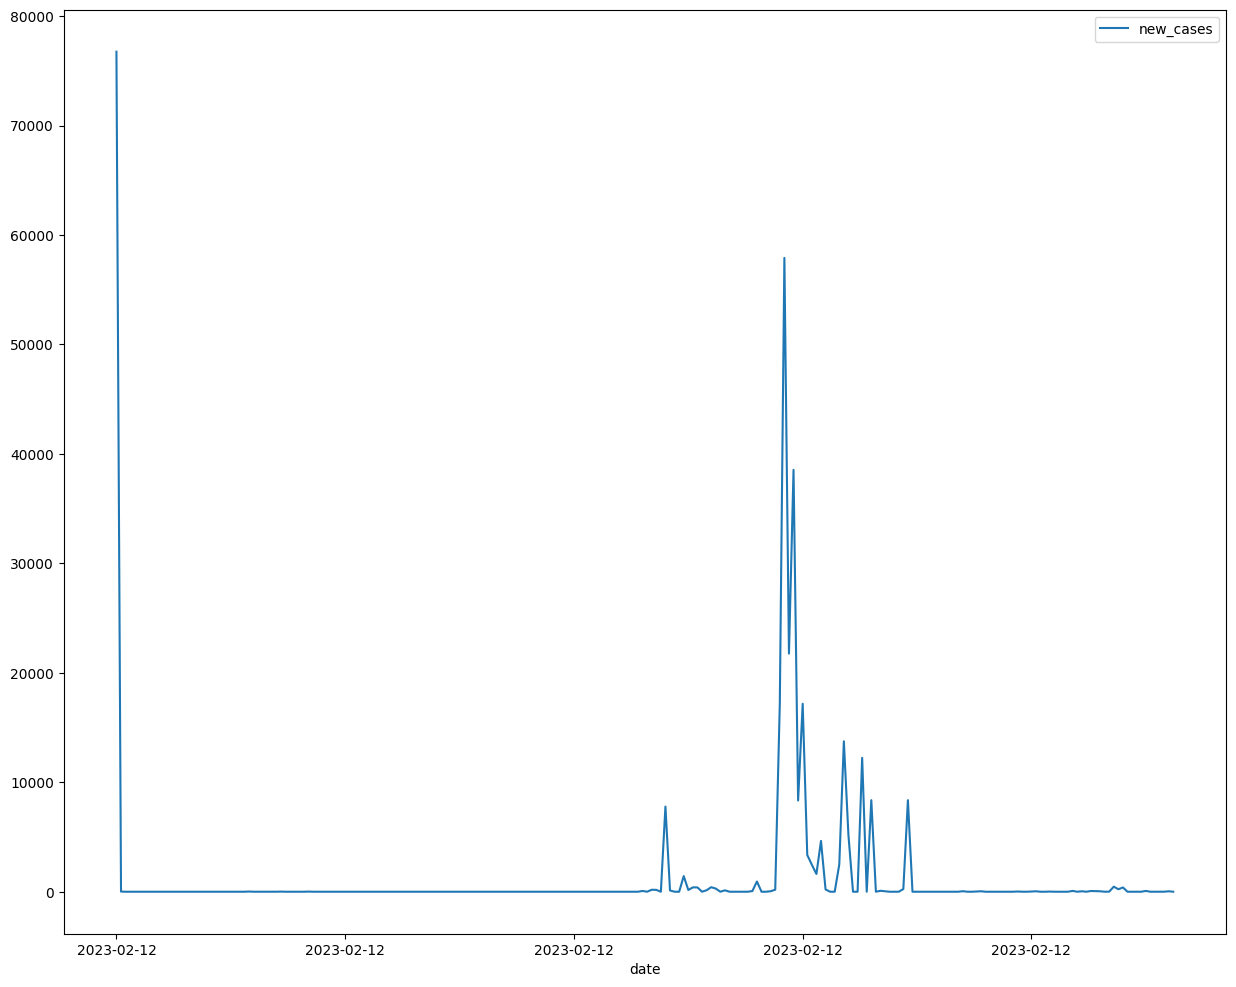

In [33]:
Main_Data.plot(x='date', y='new_cases')

<AxesSubplot: xlabel='date'>

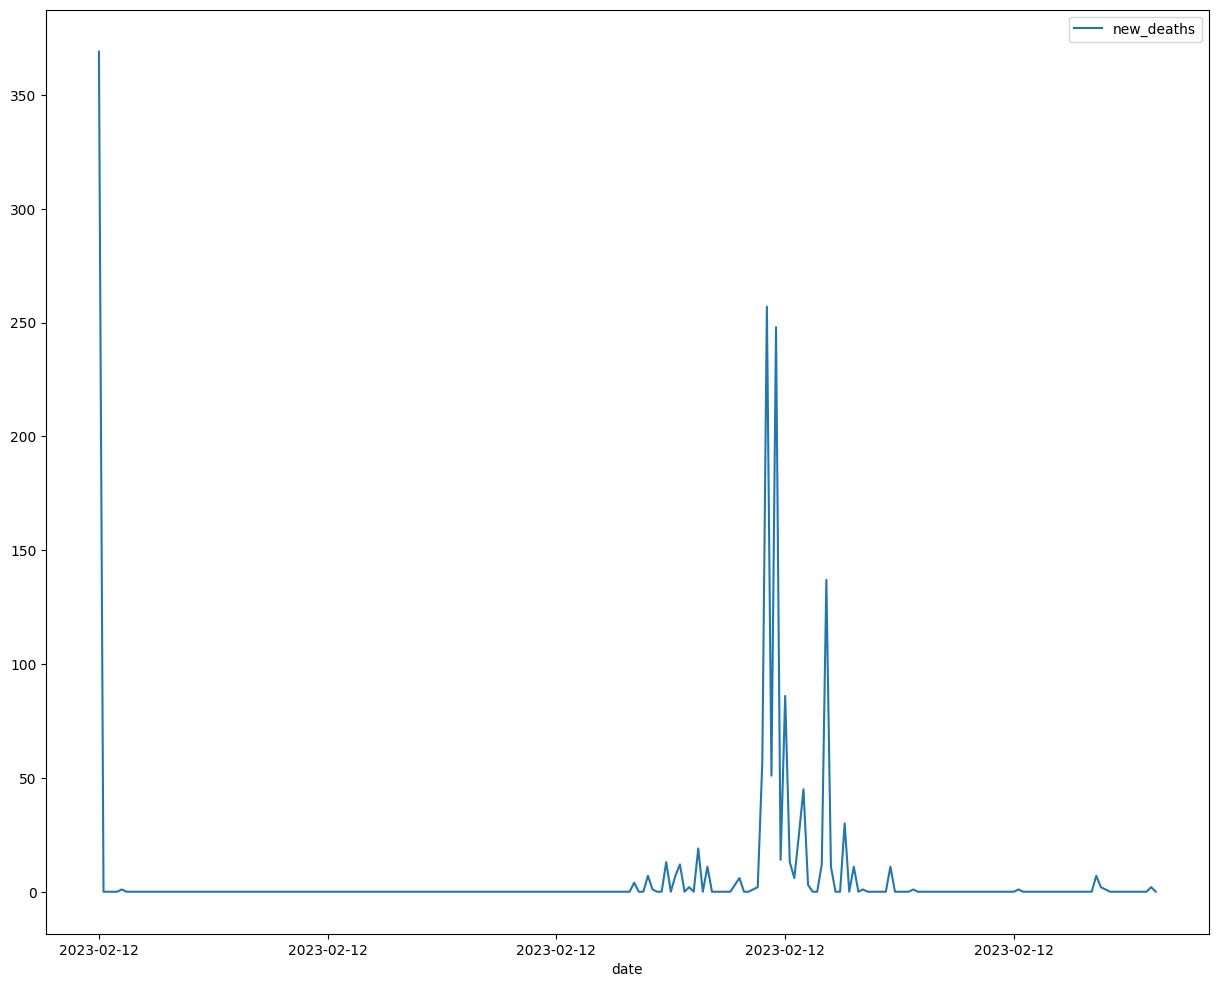

In [34]:
Main_Data.plot(x='date', y='new_deaths')

<AxesSubplot: xlabel='date'>

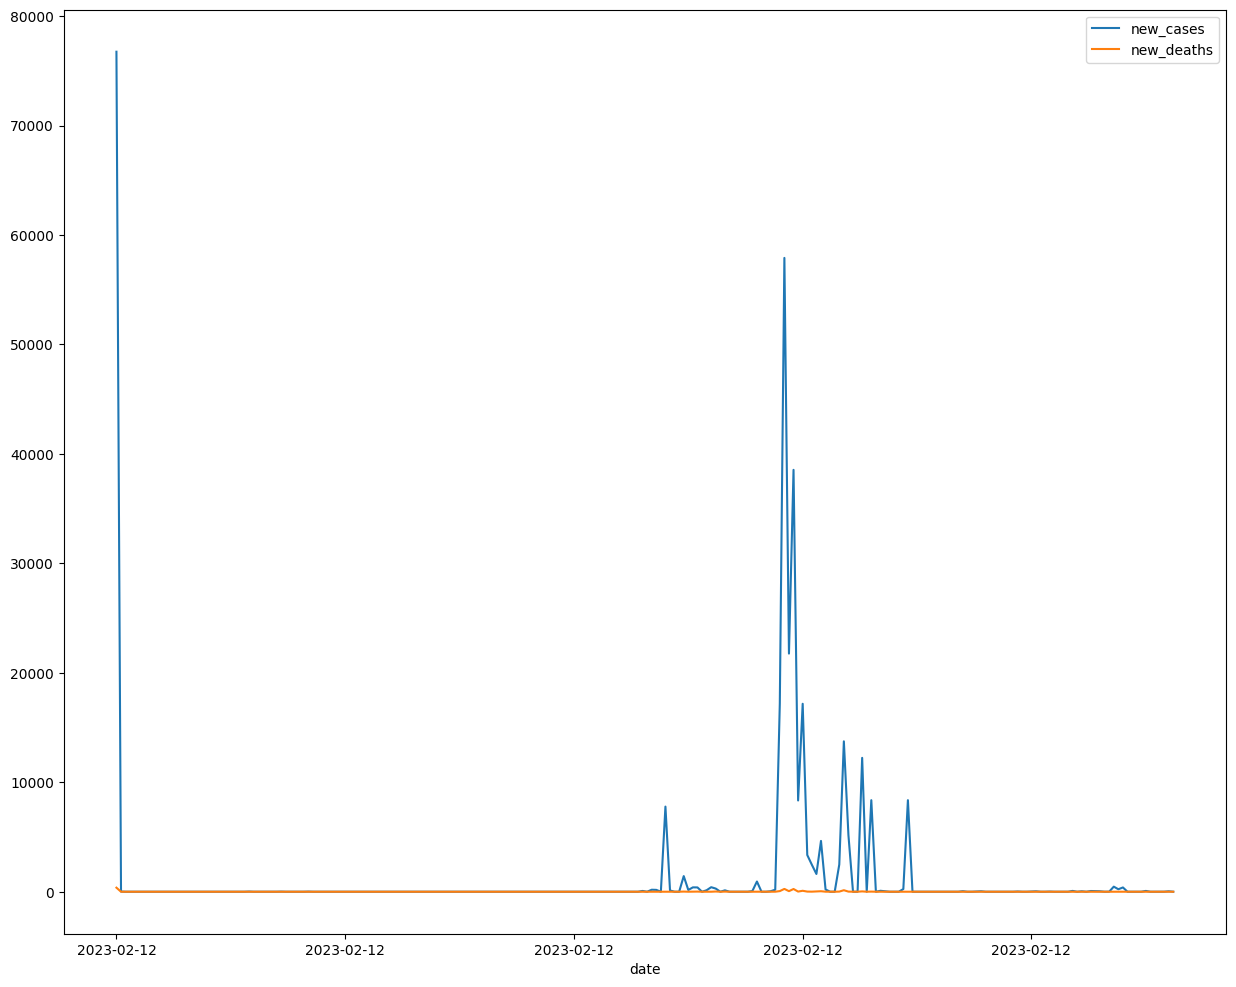

In [35]:
Main_Data.plot(x='date', y=['new_cases','new_deaths'])

### Pie Charts

In [129]:
Main_Data[['population','continent']].groupby("continent").sum()

,population
continent,
Africa,2.851597e+09
Asia,9.436791e+09
Europe,1.942192e+09
Income Based,7.946138e+09
North America,1.196445e+09
Oceania,8.980822e+07
South America,8.733288e+08
World,7.975106e+09


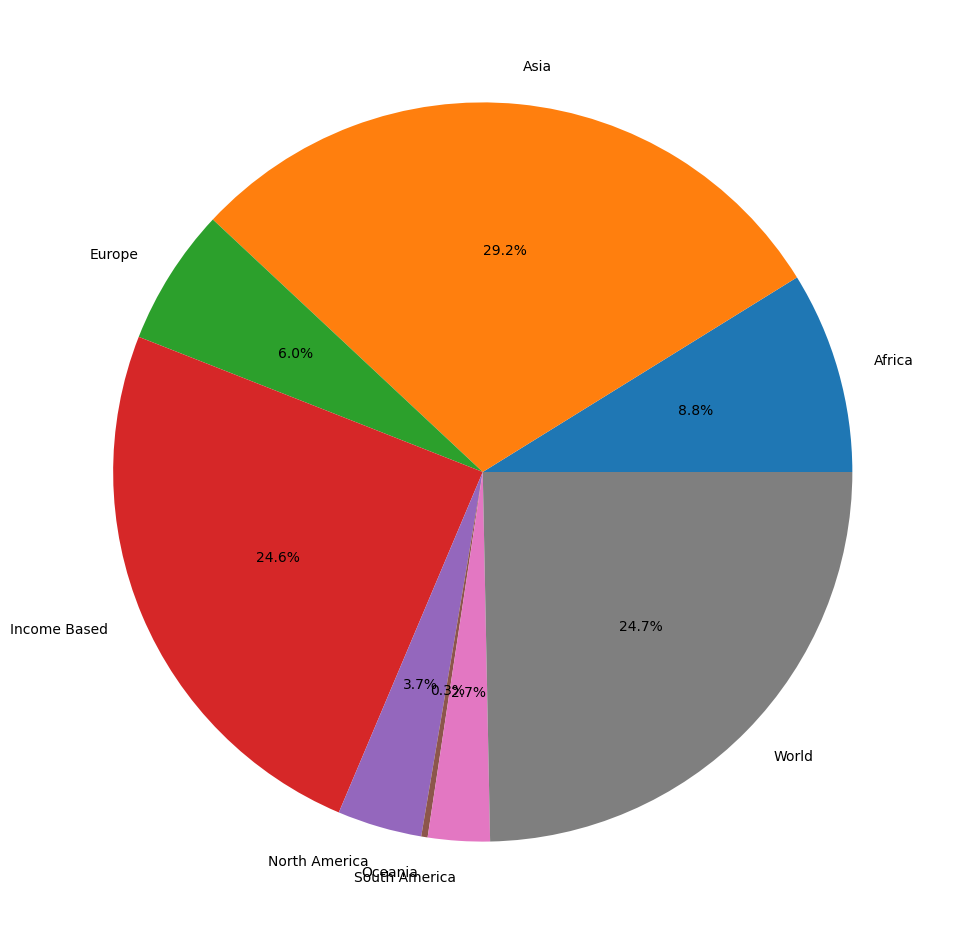

In [128]:
pyplot.pie(Main_Data[['population','continent']].groupby("continent").sum()['population'],labels=Main_Data[['population','continent']].groupby("continent").sum().index,autopct='%1.1f%%')
pyplot.show()

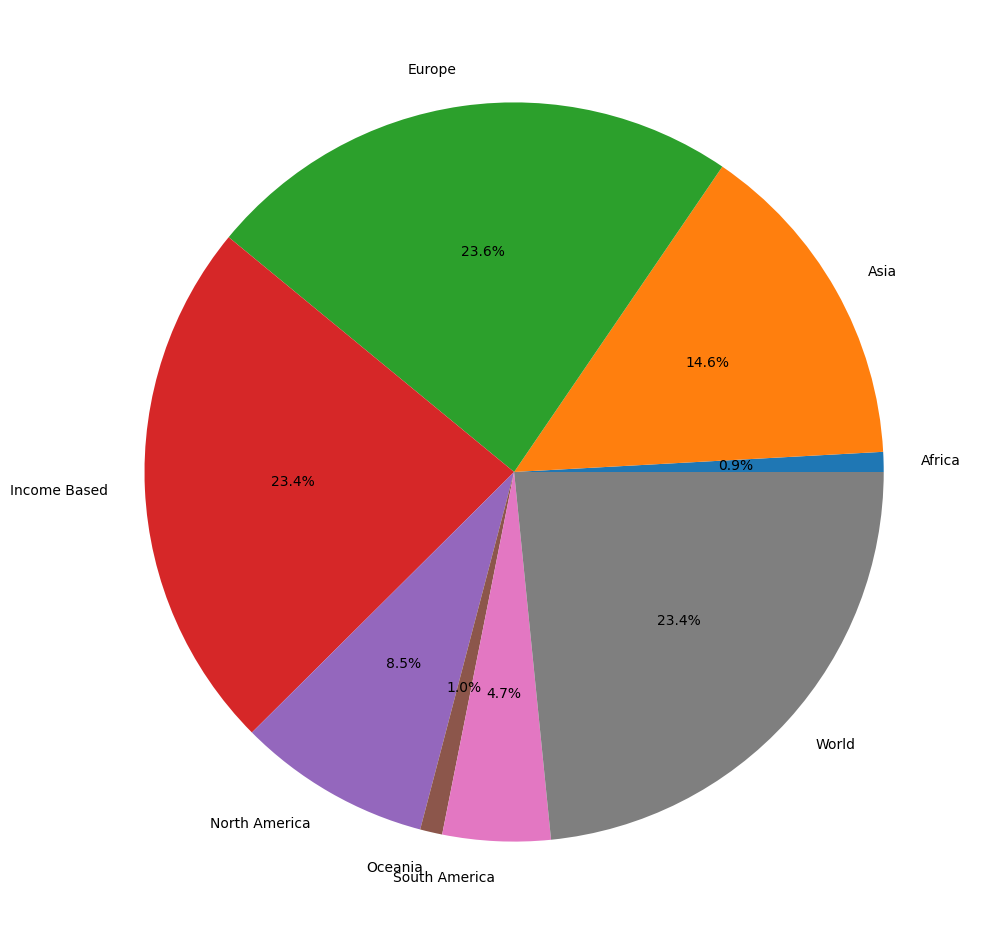

In [130]:
pyplot.pie(Main_Data[['total_cases','continent']].groupby("continent").sum()['total_cases'],labels=Main_Data[['total_cases','continent']].groupby("continent").sum().index,autopct='%1.1f%%')
pyplot.show()

### Box Plot

<AxesSubplot: >

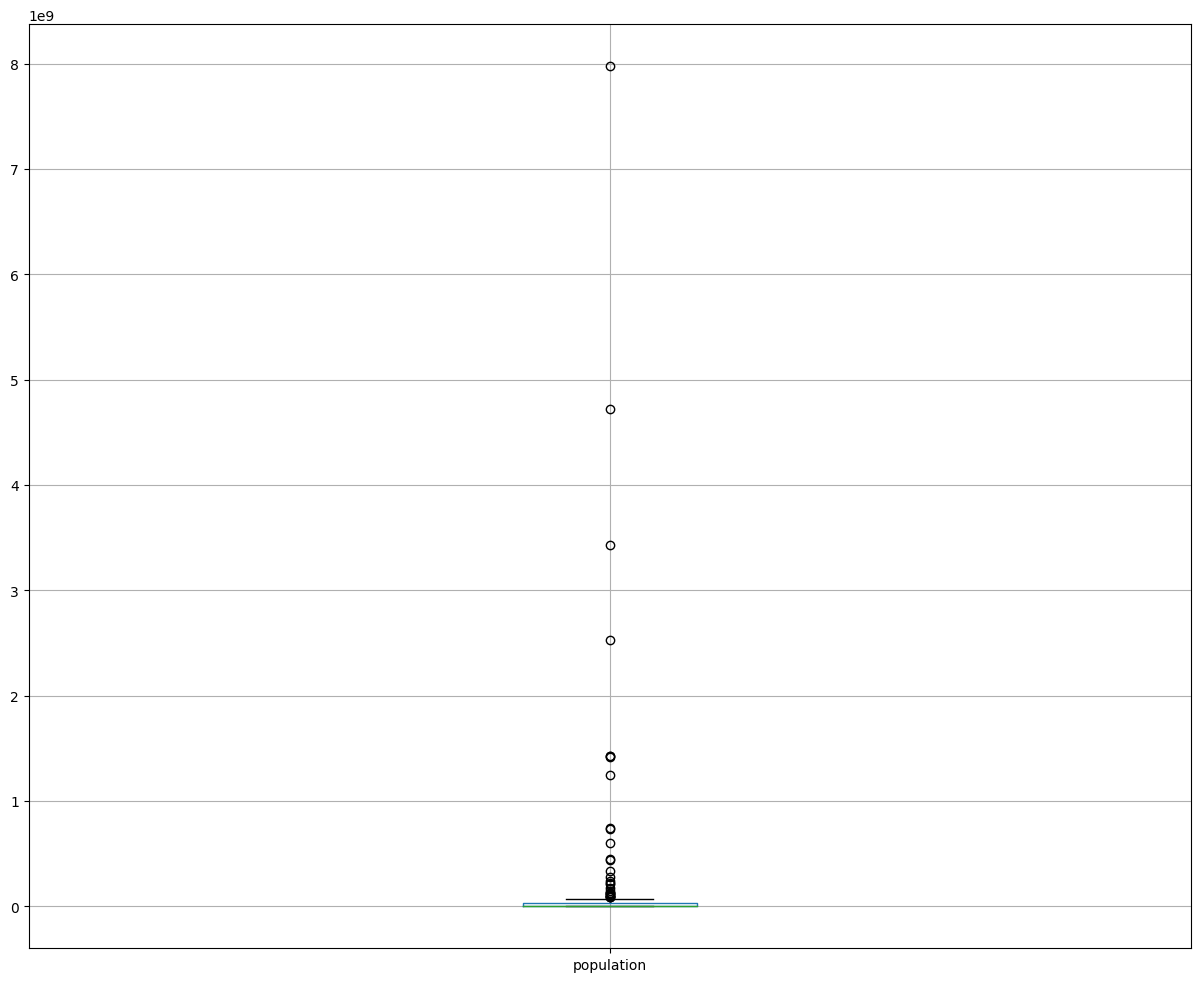

In [36]:
Main_Data.boxplot('population')

<AxesSubplot: >

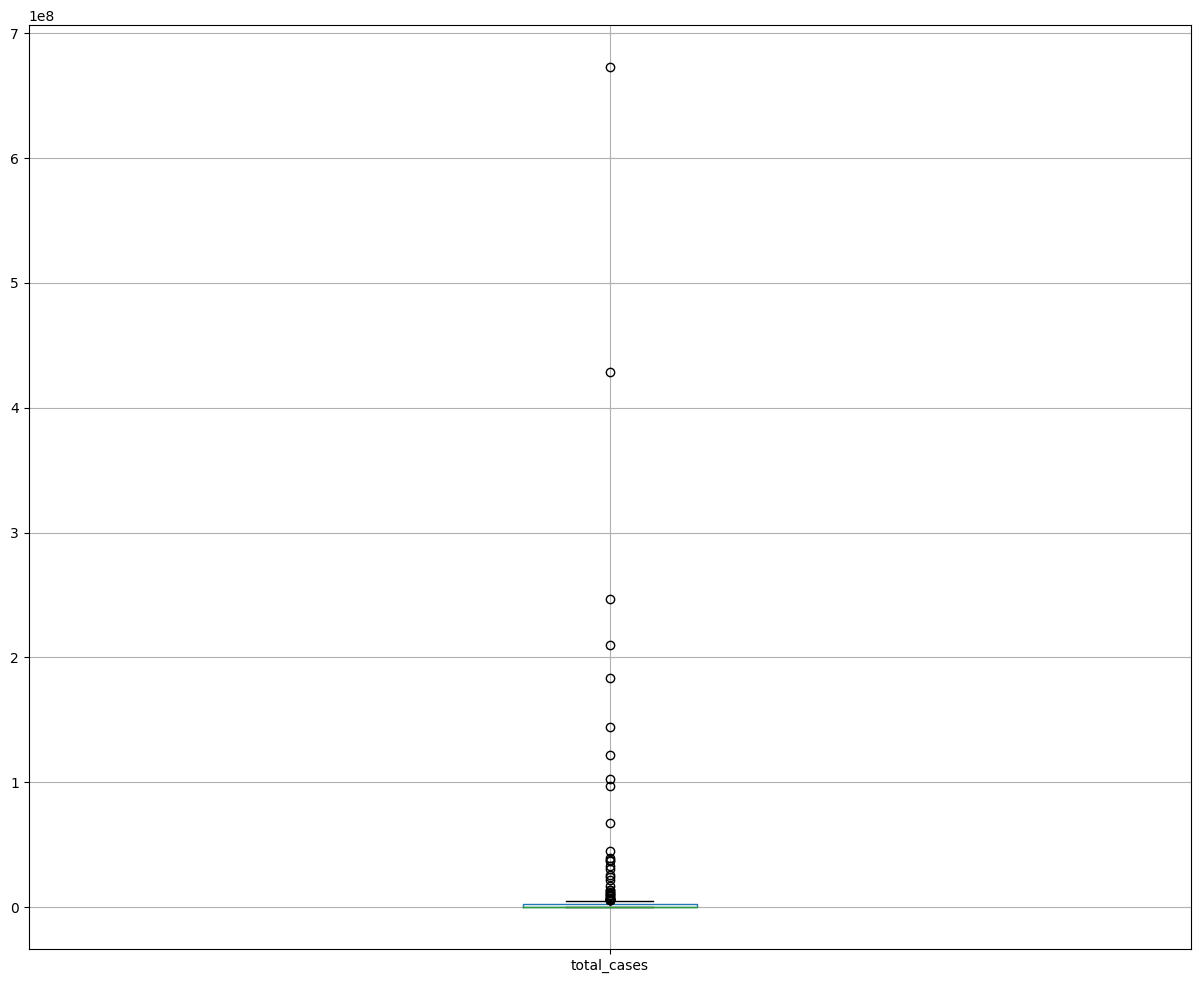

In [37]:
Main_Data.boxplot('total_cases')

<AxesSubplot: >

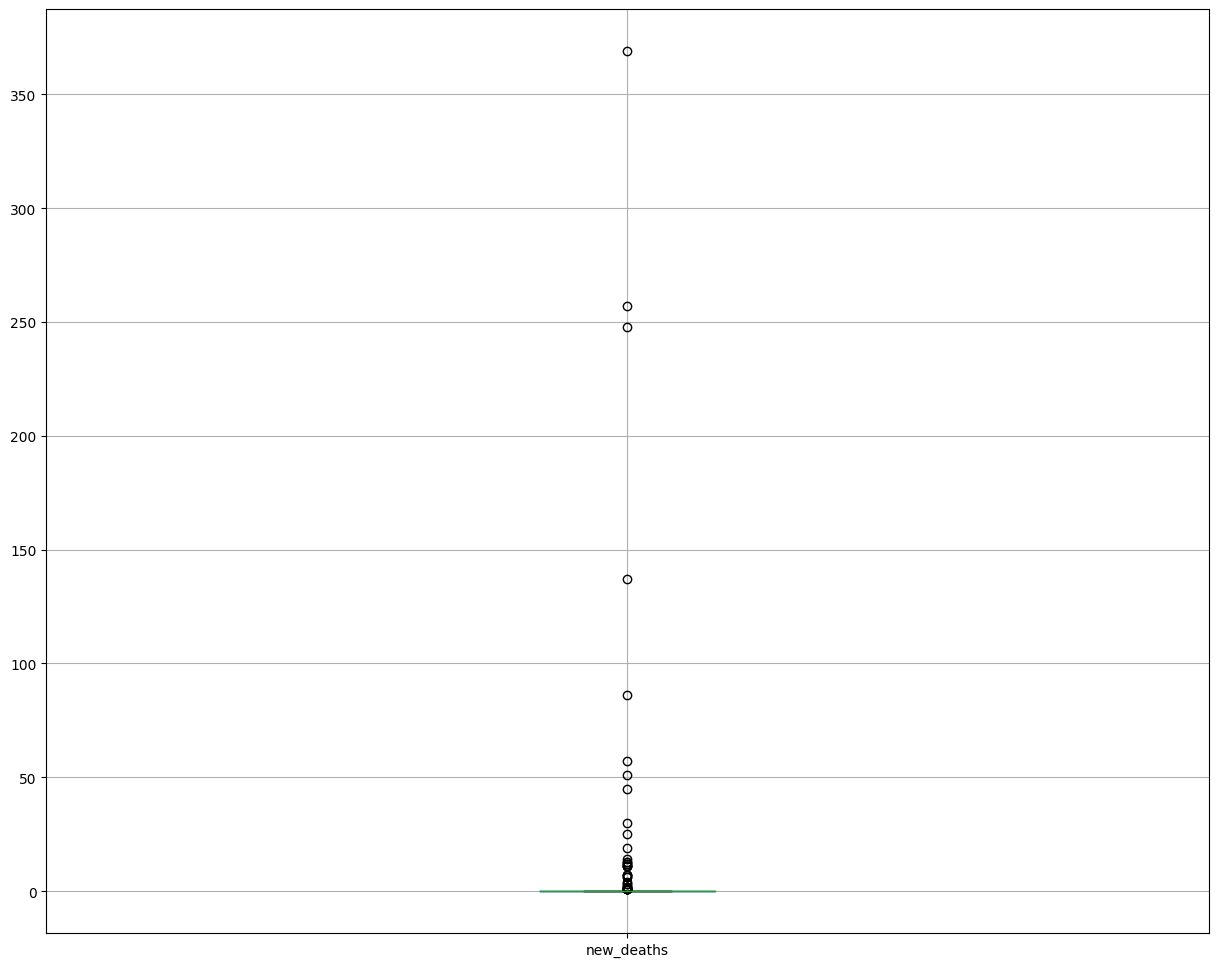

In [38]:
Main_Data.boxplot('new_deaths')

<AxesSubplot: >

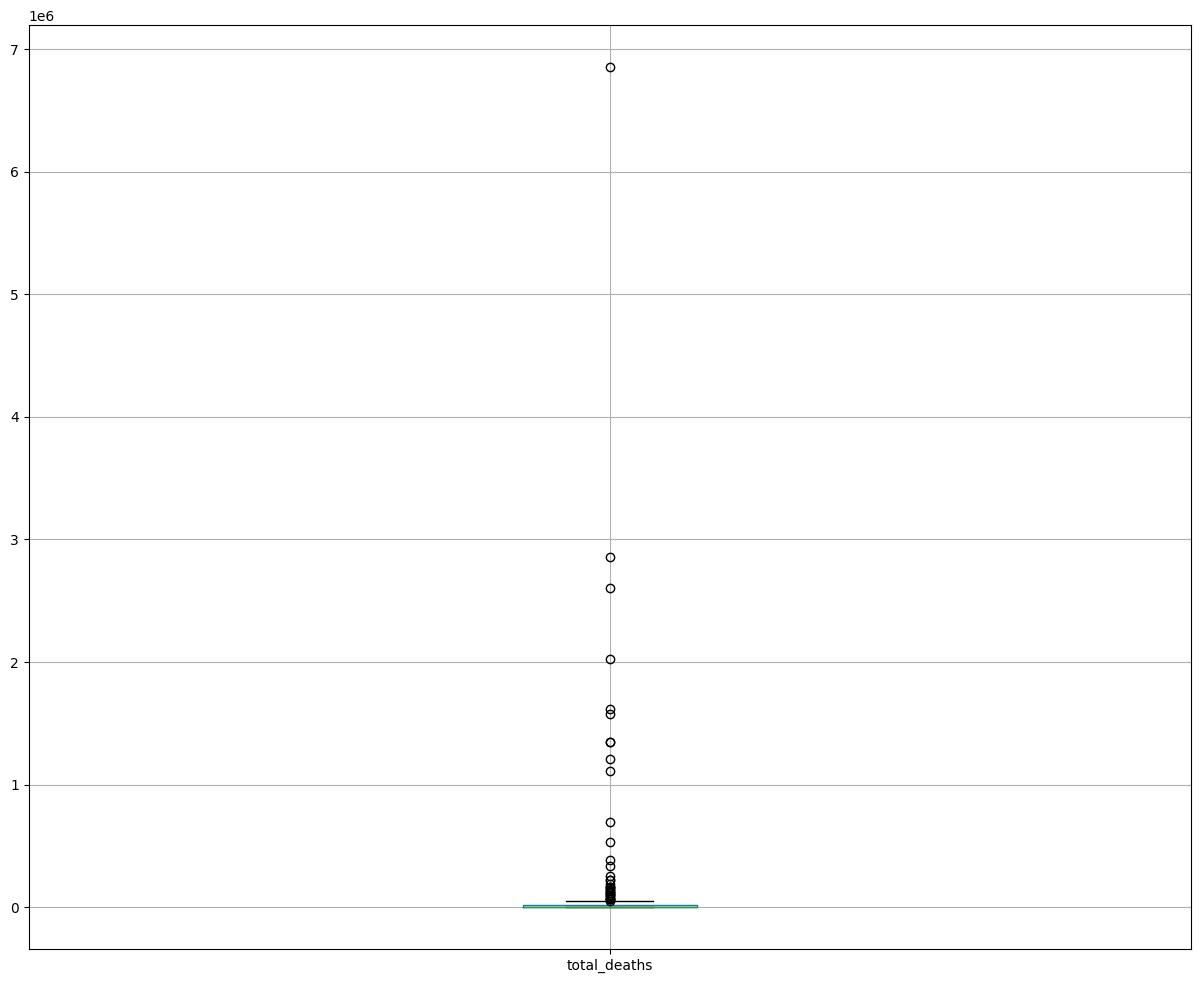

In [39]:
Main_Data.boxplot('total_deaths')

<AxesSubplot: >

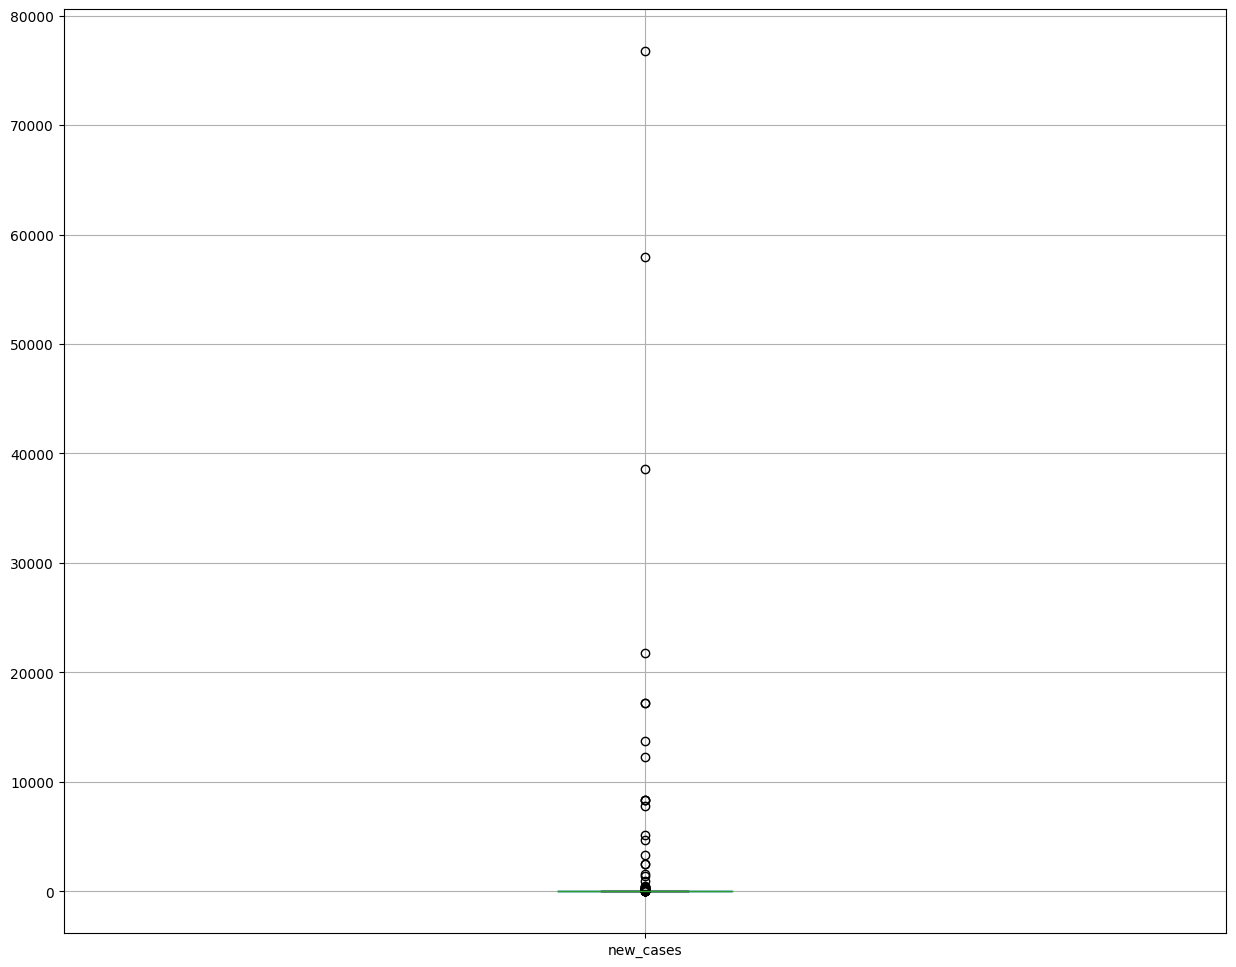

In [40]:
Main_Data.boxplot('new_cases')

<AxesSubplot: >

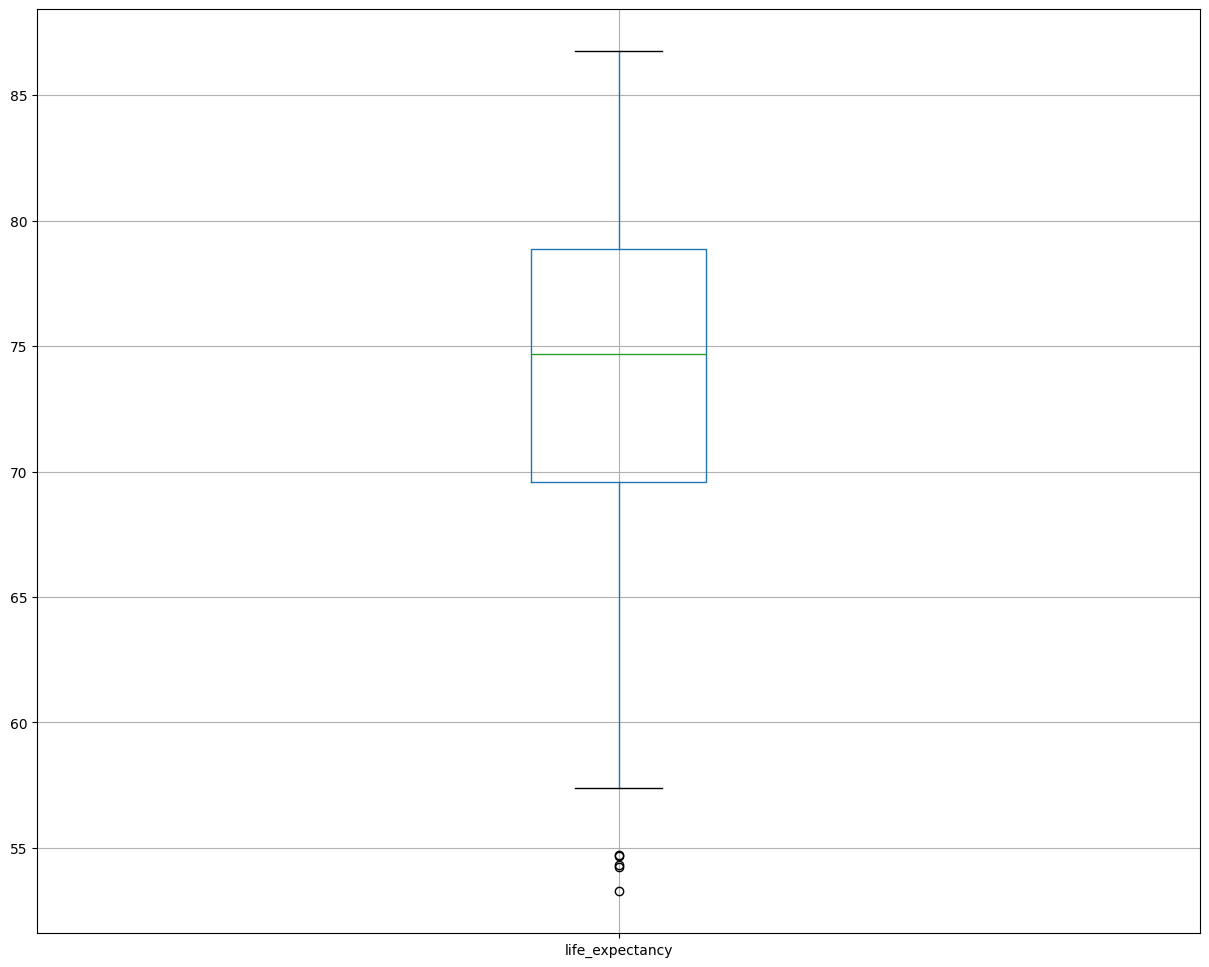

In [41]:
Main_Data.boxplot('life_expectancy')

### Violin Plots

<AxesSubplot: >

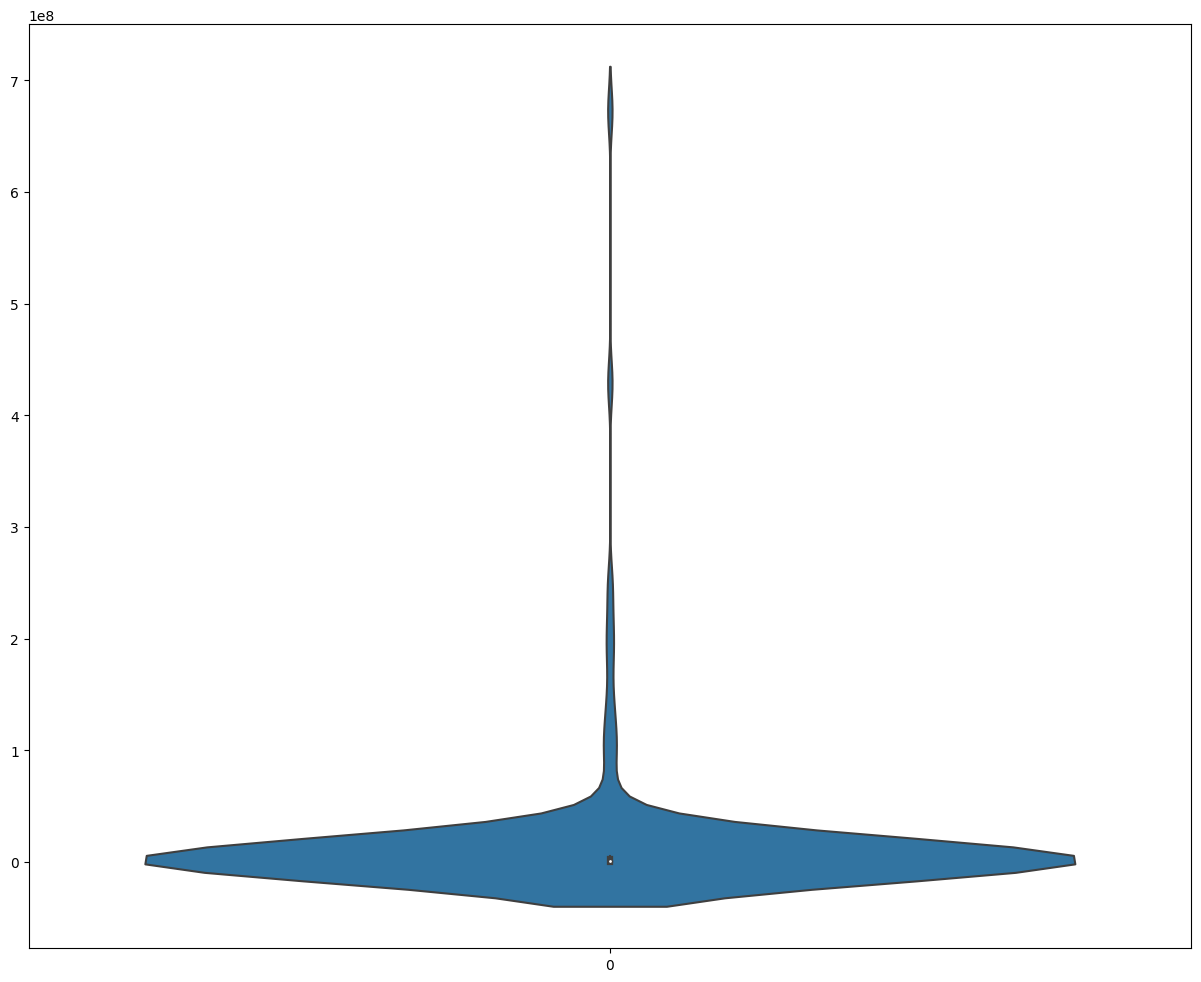

In [42]:
seaborn.violinplot(Main_Data['total_cases'])

<AxesSubplot: >

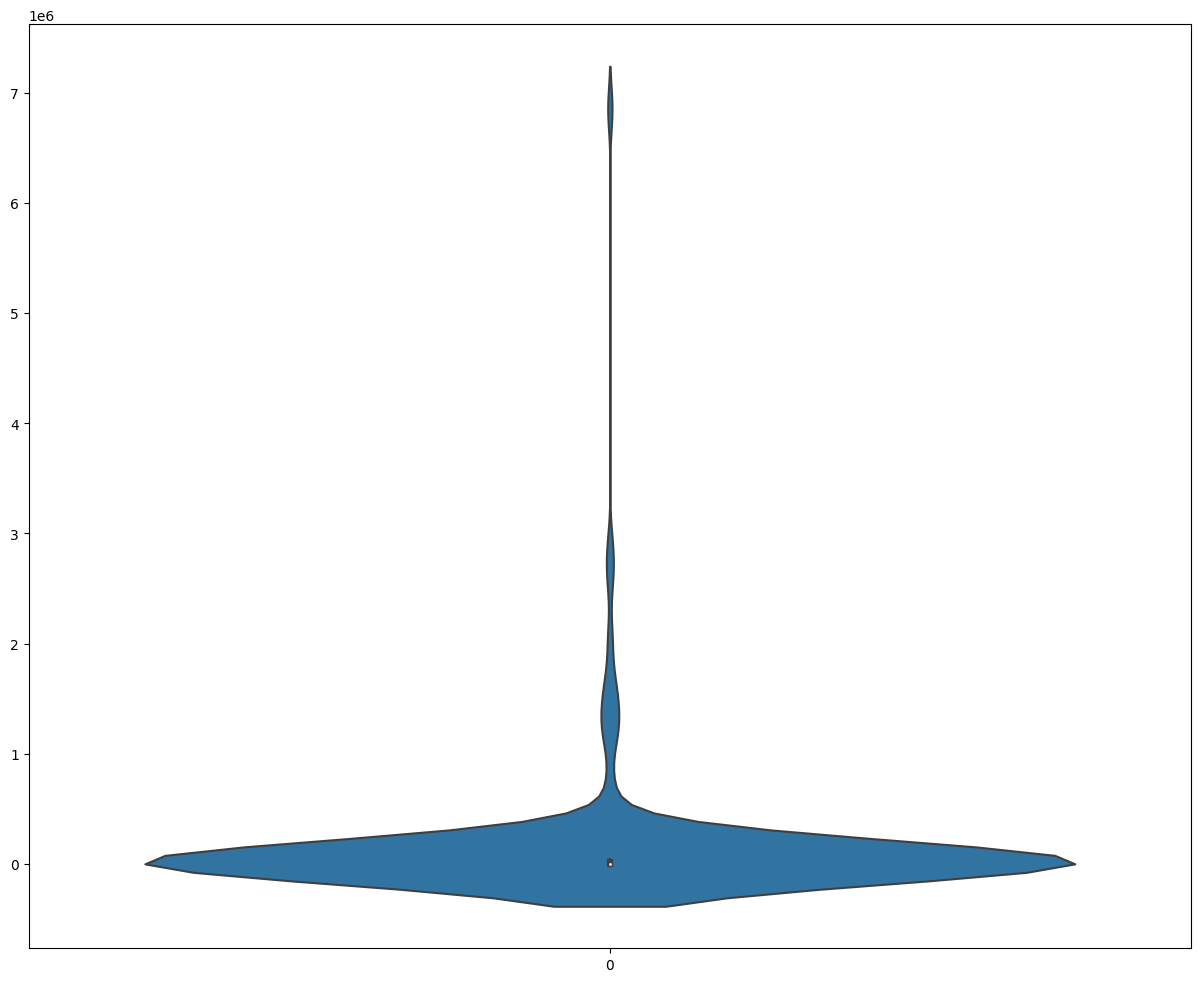

In [43]:
seaborn.violinplot(Main_Data['total_deaths'])

<AxesSubplot: >

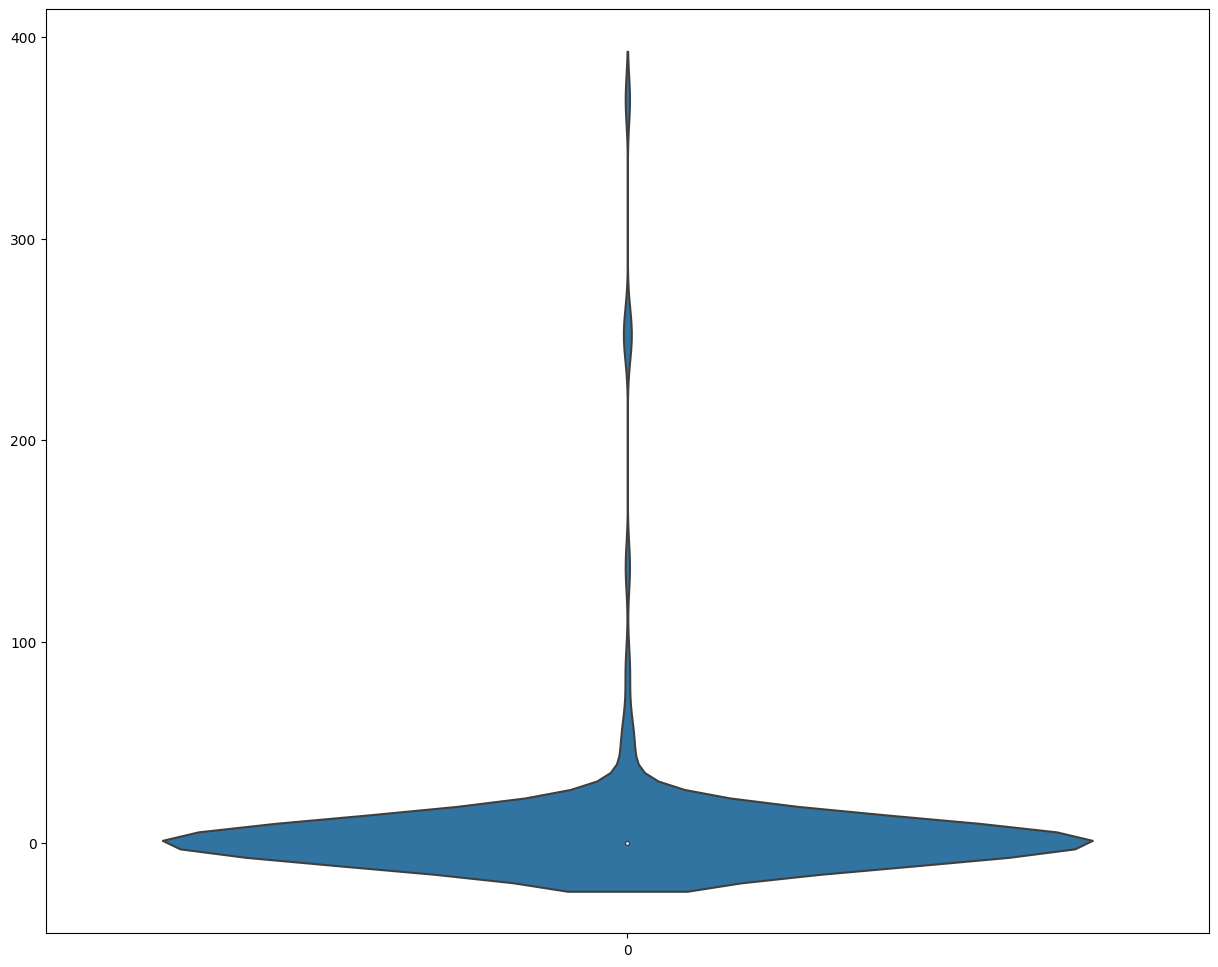

In [44]:
seaborn.violinplot(Main_Data['new_deaths'])

<AxesSubplot: >

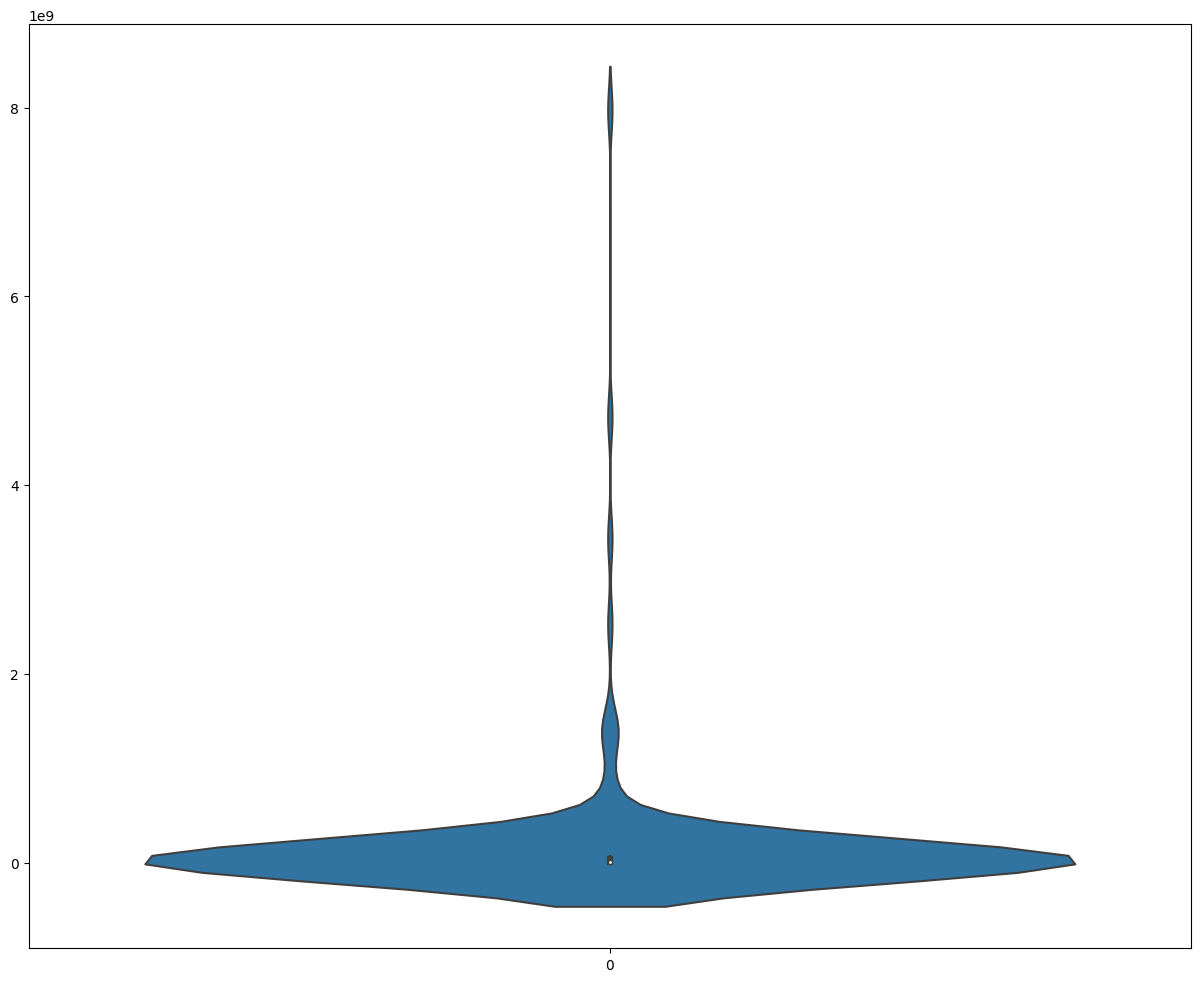

In [46]:
seaborn.violinplot(Main_Data['population'])

<AxesSubplot: >

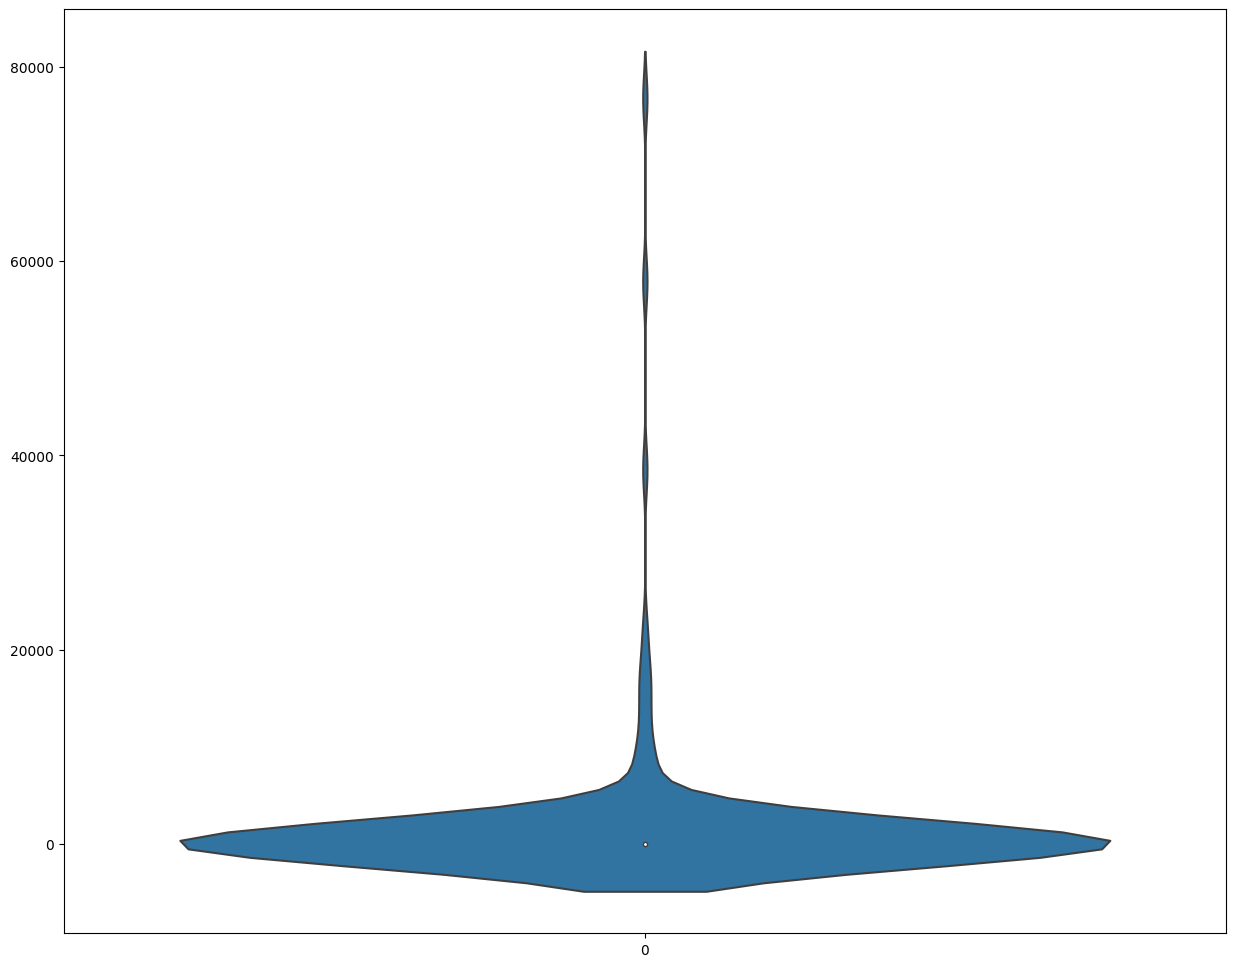

In [45]:
seaborn.violinplot(Main_Data['new_cases'])

<AxesSubplot: >

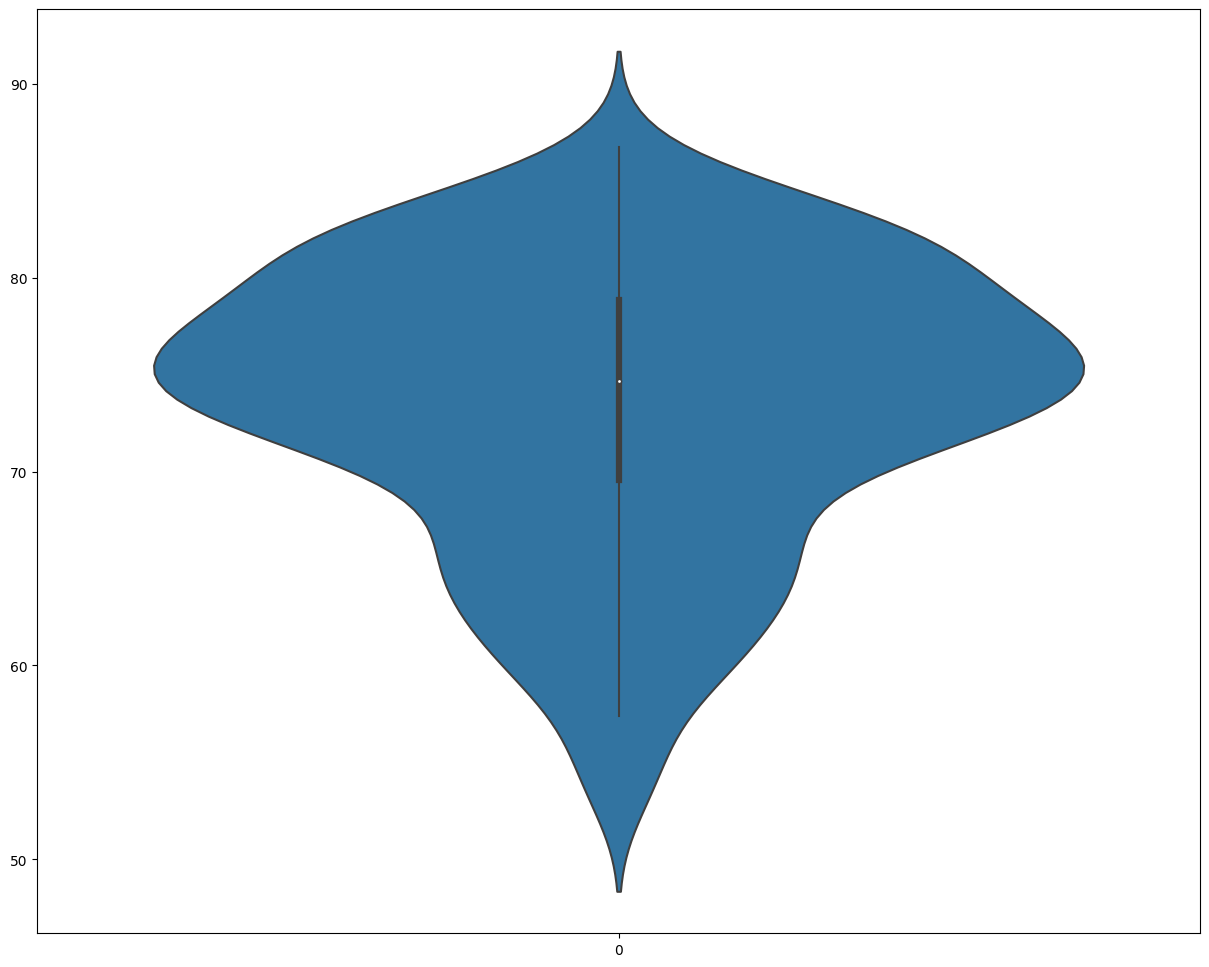

In [47]:
seaborn.violinplot(Main_Data['life_expectancy'])

### distplot

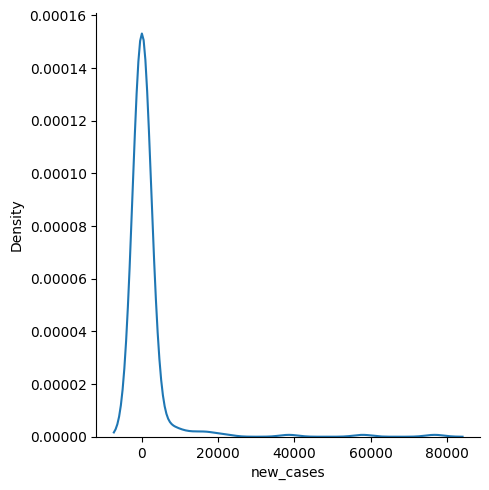

In [48]:
seaborn.displot(Main_Data['new_cases'],kind='kde')

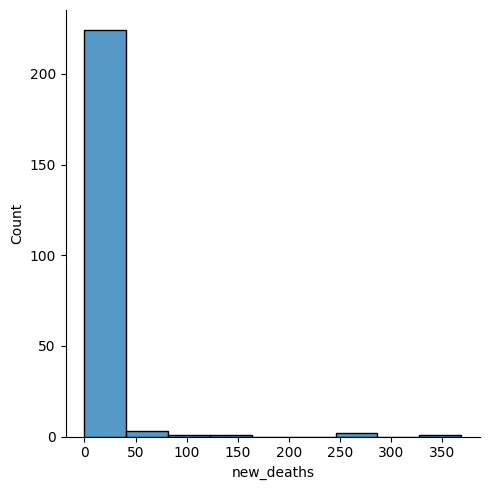

In [49]:
seaborn.displot(Main_Data['new_deaths'],kind='hist')

### joinplot

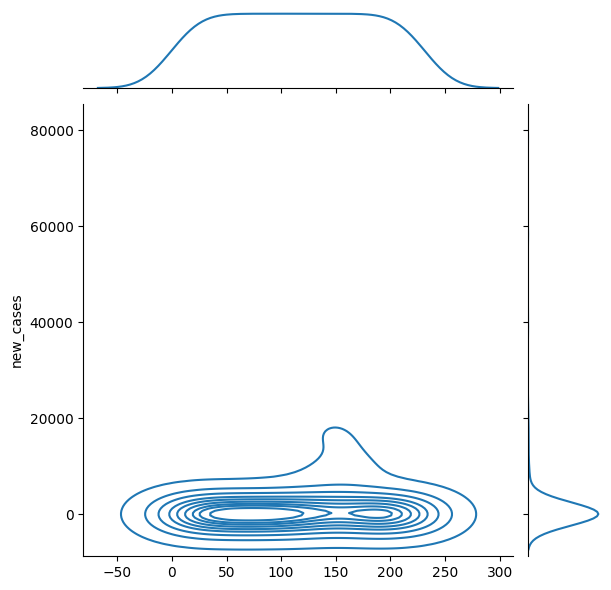

In [51]:
seaborn.jointplot(Main_Data['new_cases'],kind='kde')

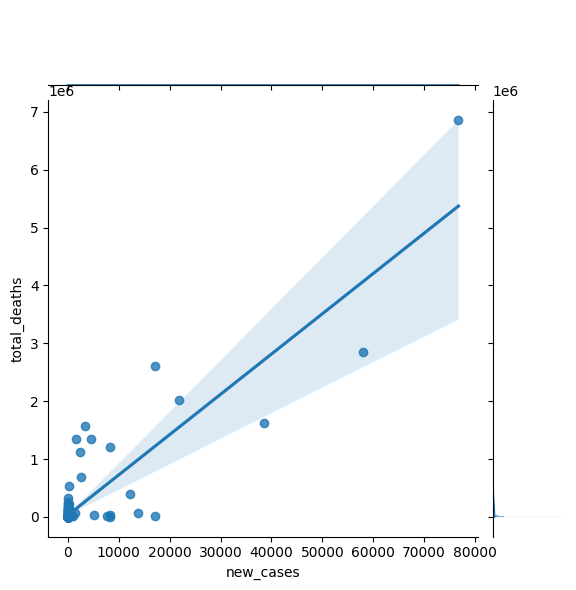

In [52]:
seaborn.jointplot(x=Main_Data['new_cases'],y=Main_Data['total_deaths'],kind="reg")

### pairplot


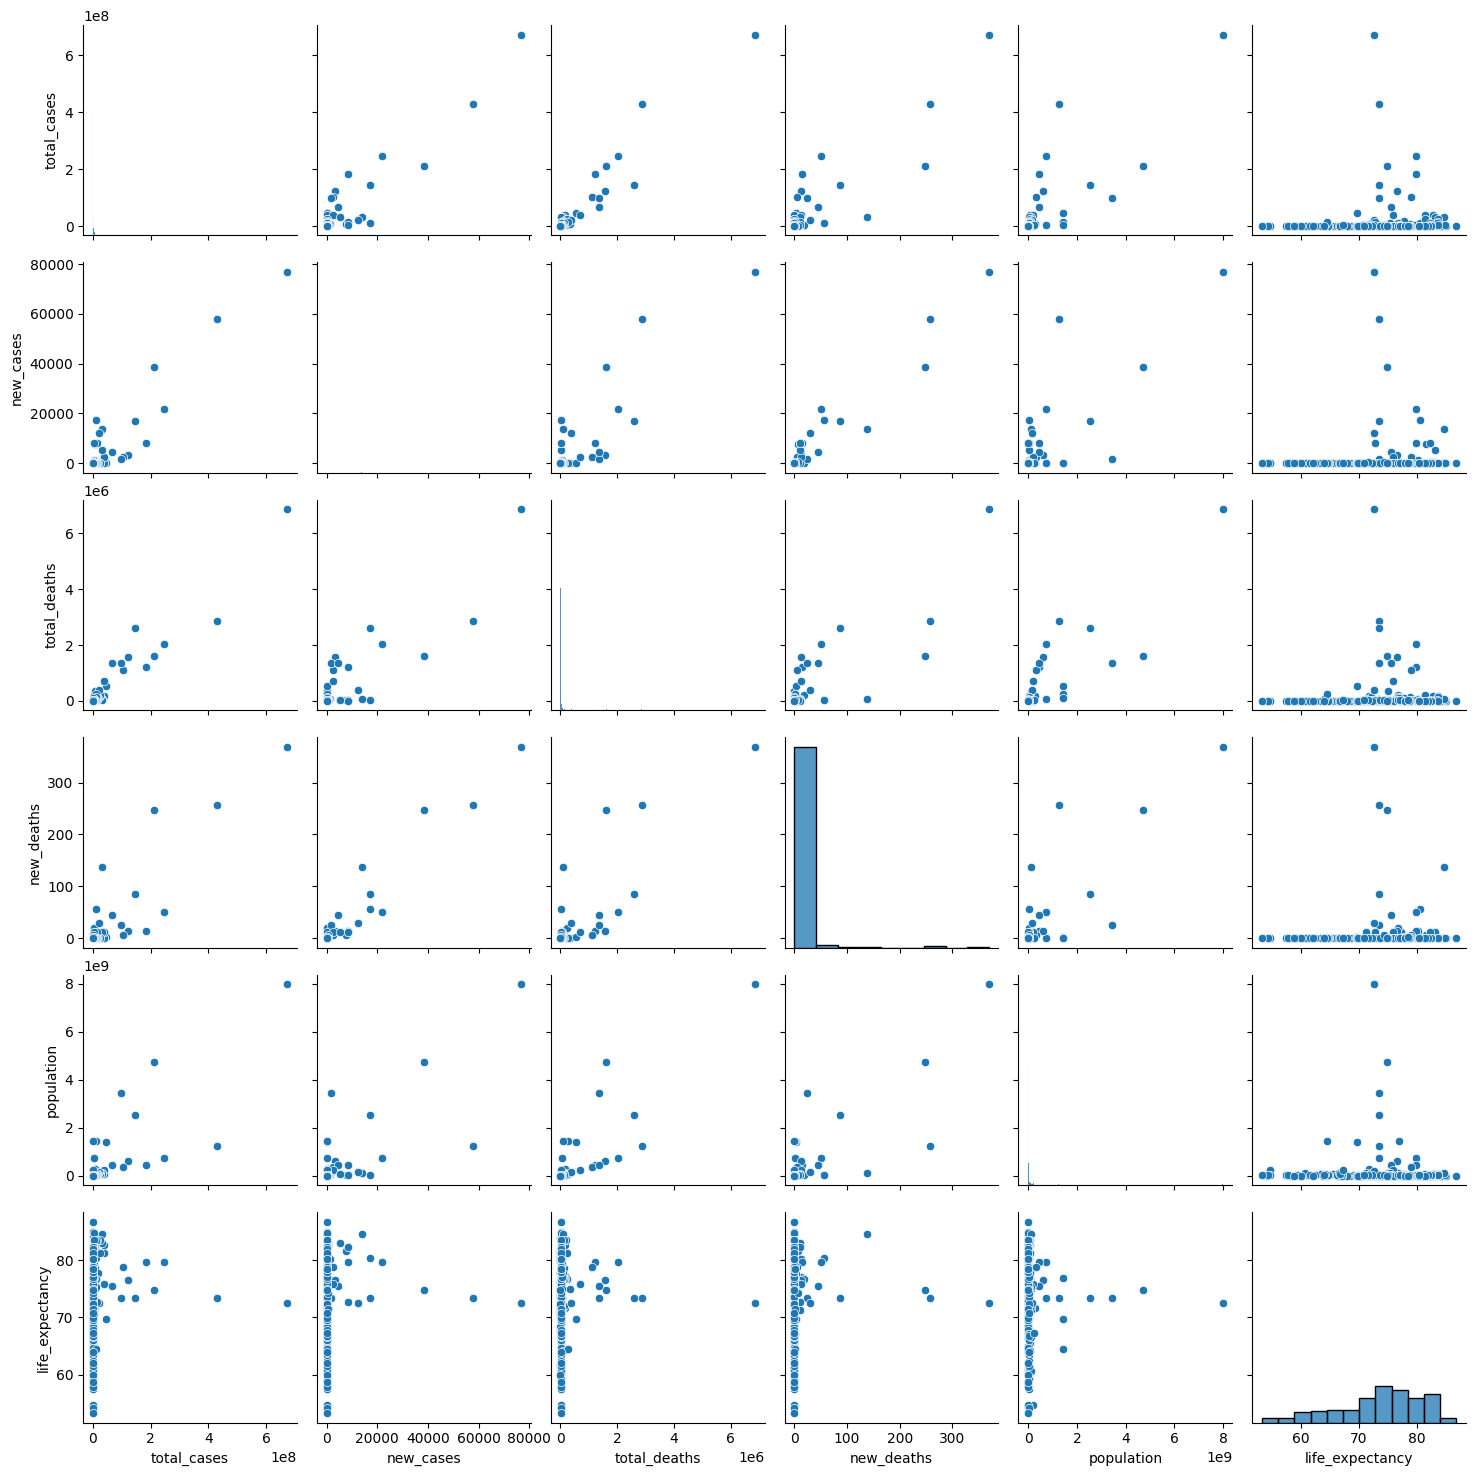

In [53]:
seaborn.pairplot(Main_Data)

### rugplot

### countplot

<AxesSubplot: xlabel='new_cases', ylabel='total_deaths'>

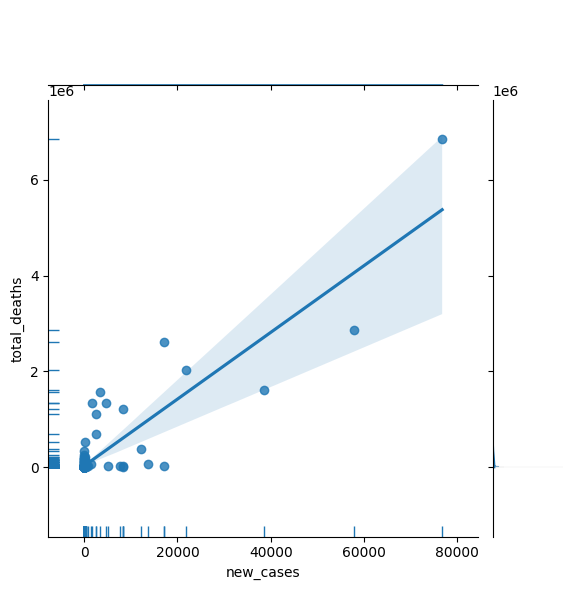

In [54]:
seaborn.jointplot(x=Main_Data['new_cases'],y=Main_Data['total_deaths'],kind="reg")
seaborn.rugplot(x=Main_Data['new_cases'],y=Main_Data['total_deaths'])

<Axes: xlabel='continent', ylabel='count'>

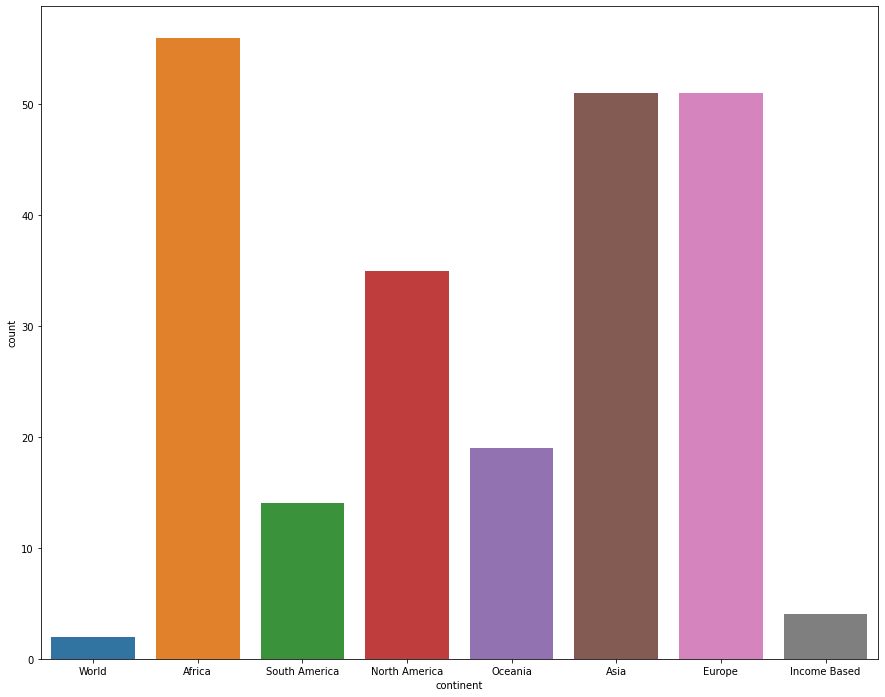

In [120]:
seaborn.countplot(
    x=Main_Data['continent'],
)

### stripplot

<AxesSubplot: xlabel='life_expectancy', ylabel='continent'>

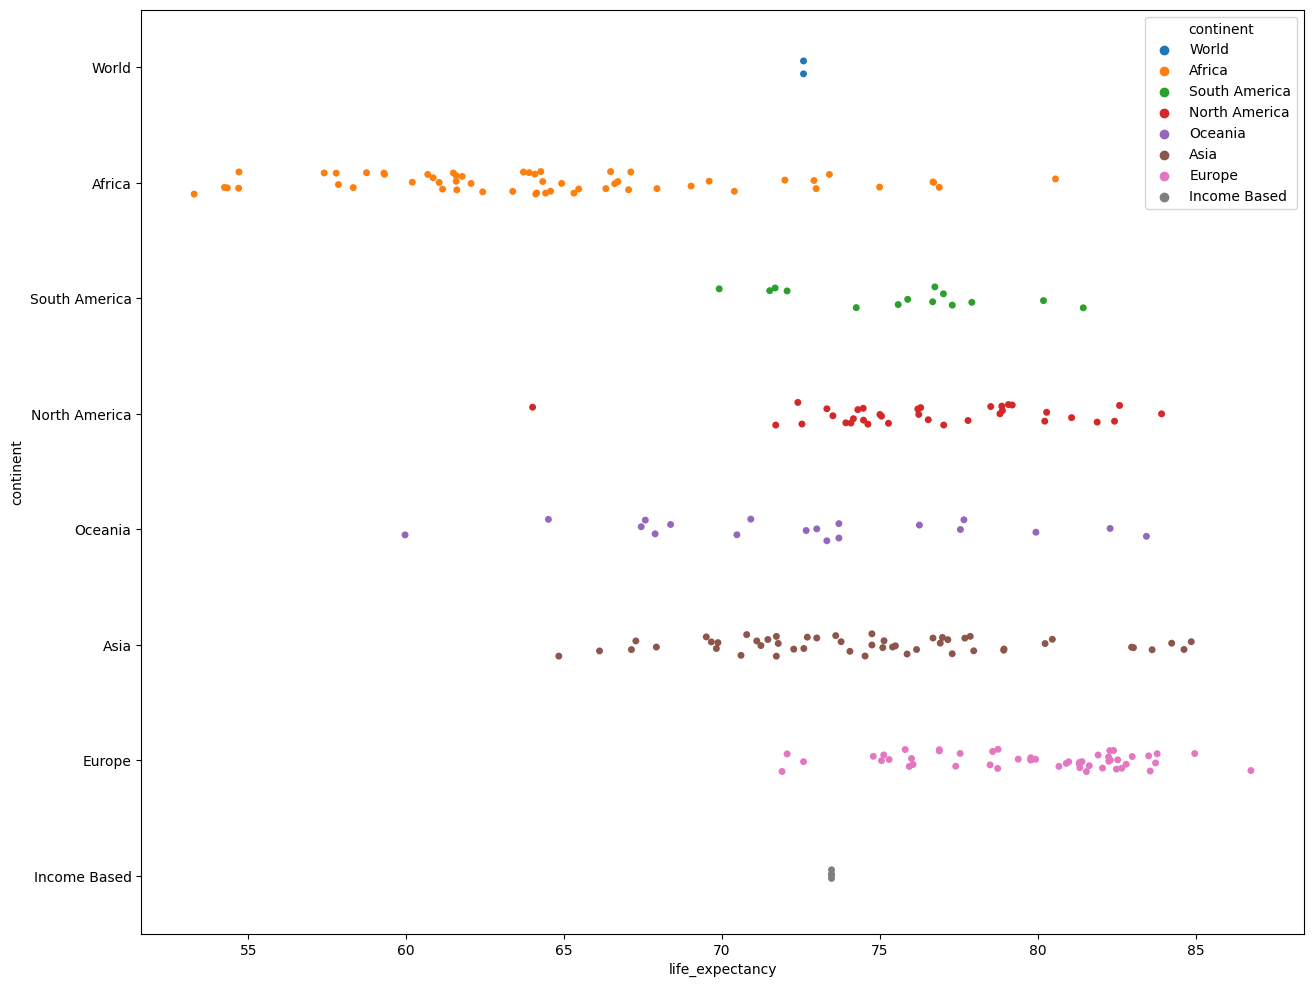

In [91]:
seaborn.stripplot(
    Main_Data,x='life_expectancy',y='continent',hue='continent'
)

### swarmplot

<AxesSubplot: xlabel='continent', ylabel='life_expectancy'>

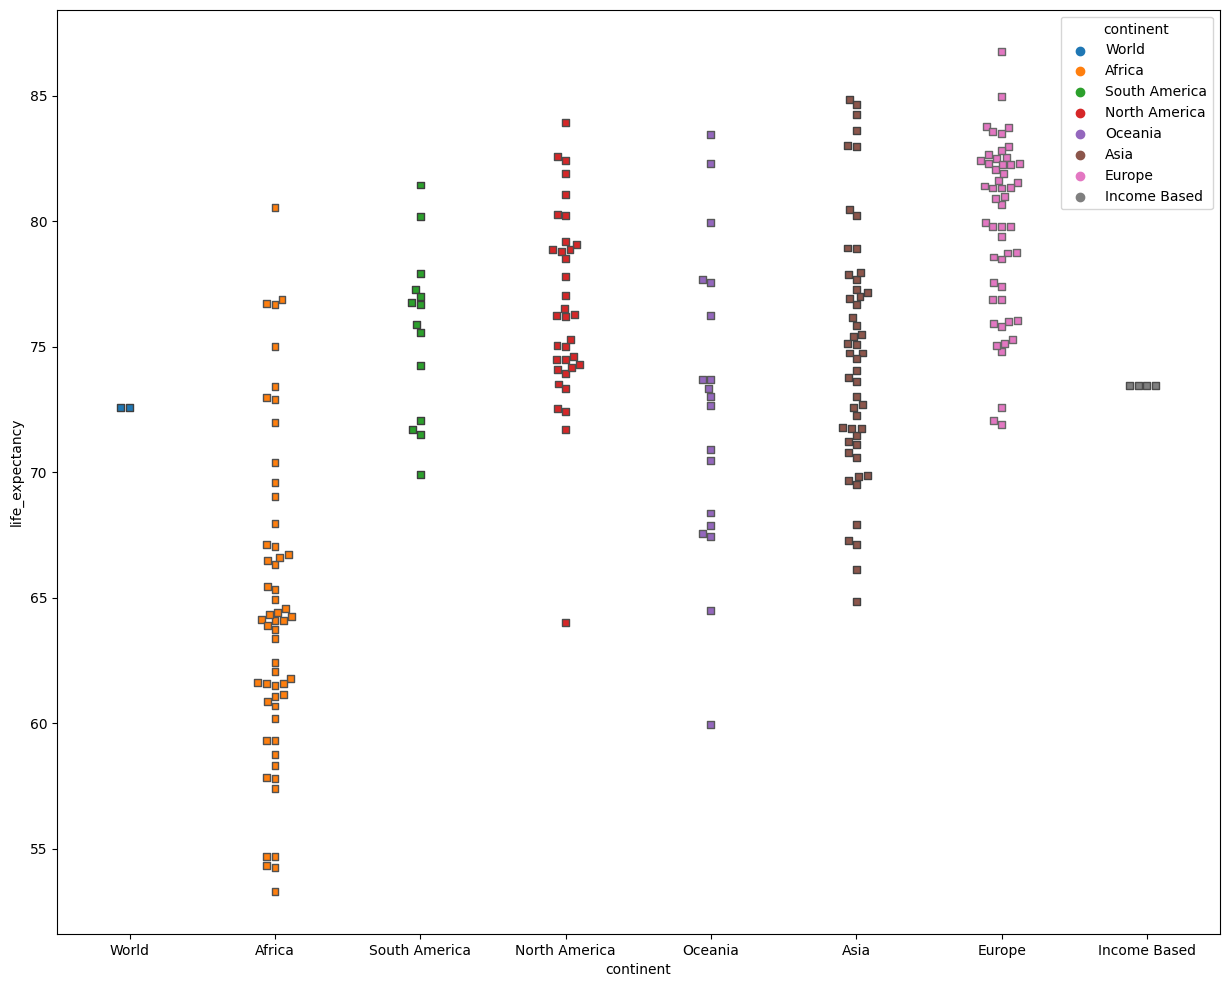

In [89]:
seaborn.swarmplot(
    Main_Data,x='continent',y='life_expectancy',hue='continent',marker="s", linewidth=1
)

### heatmap

<AxesSubplot: >

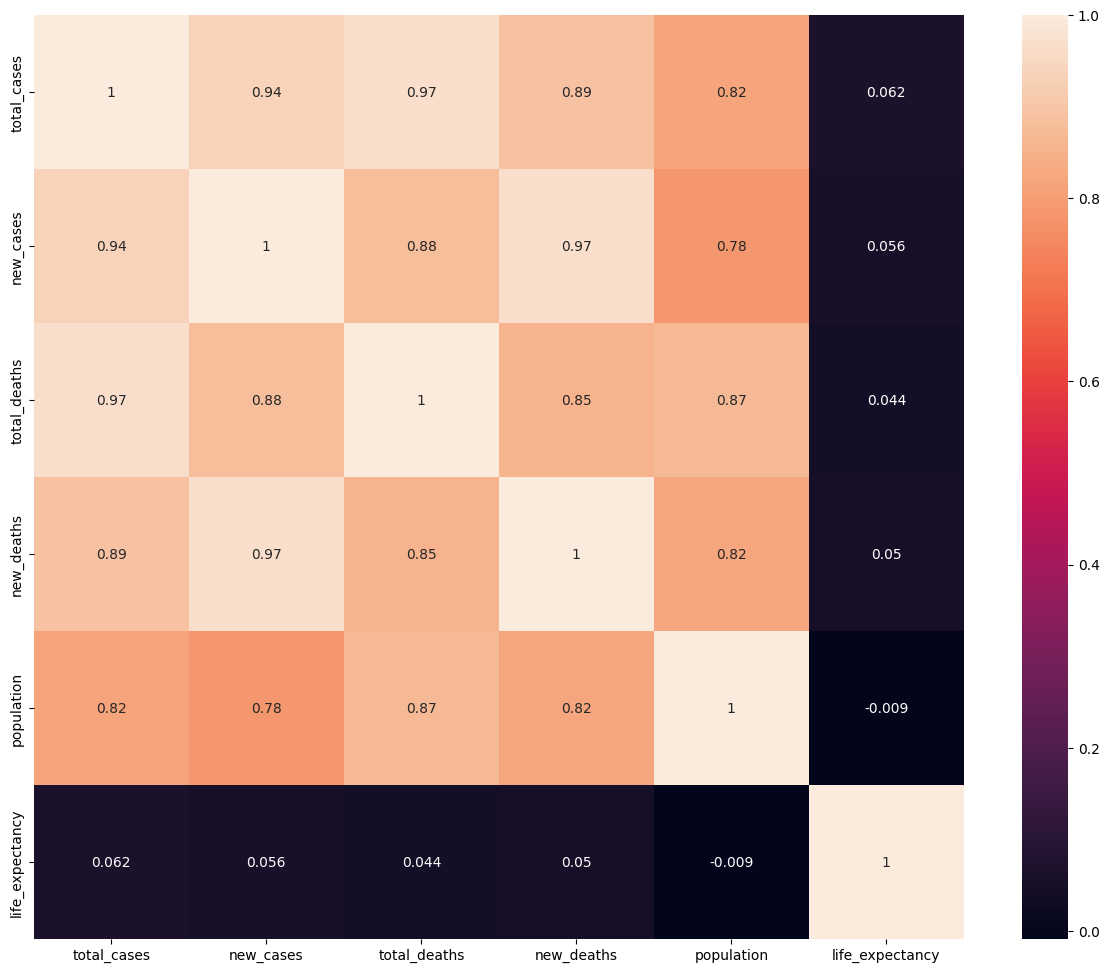

In [90]:
seaborn.heatmap(Main_Data.corr(),annot=True)

### clusrmap

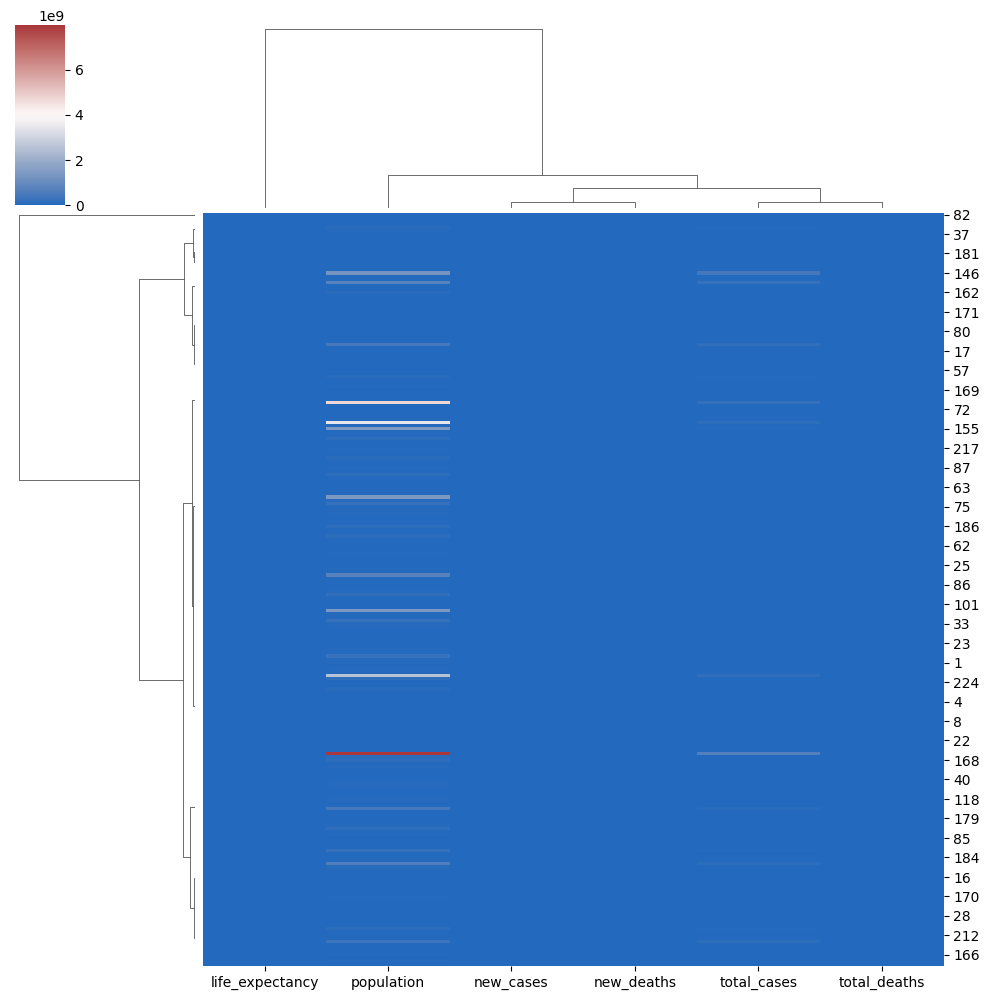

In [136]:
seaborn.clustermap(Main_Data[Main_Data.describe().columns],cmap="vlag",metric="correlation")

### lmplot


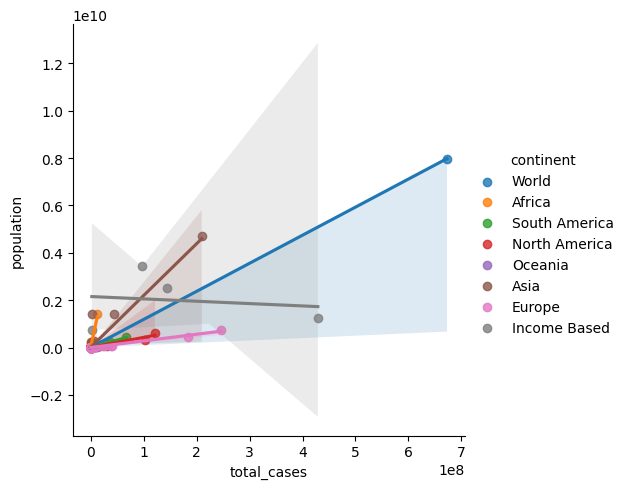

In [149]:
seaborn.lmplot(Main_Data,x='total_cases',y='population',hue='continent')

### facetgrid

In [161]:
seaborn.get_dataset_names()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']

In [166]:
Temp_Datasets=seaborn.load_dataset('tips')

In [167]:
Temp_Datasets

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


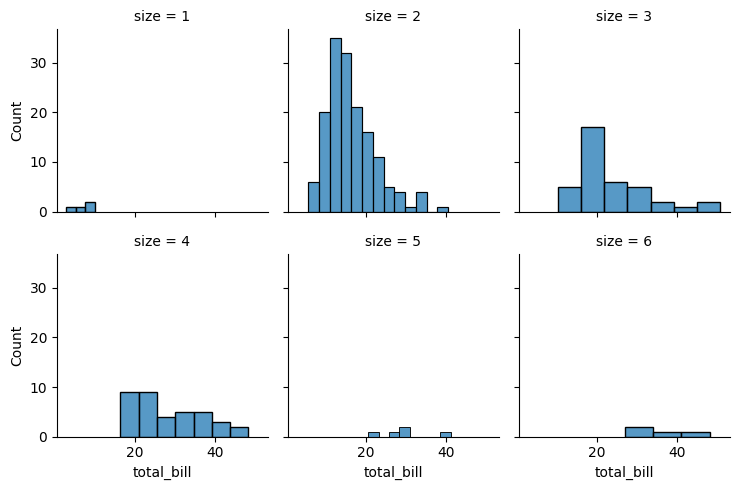

In [173]:
seaborn.FacetGrid(Temp_Datasets, col="size", height=2.5, col_wrap=3).map(seaborn.histplot,'total_bill')

### Scatter Plots

<AxesSubplot: xlabel='date', ylabel='population'>

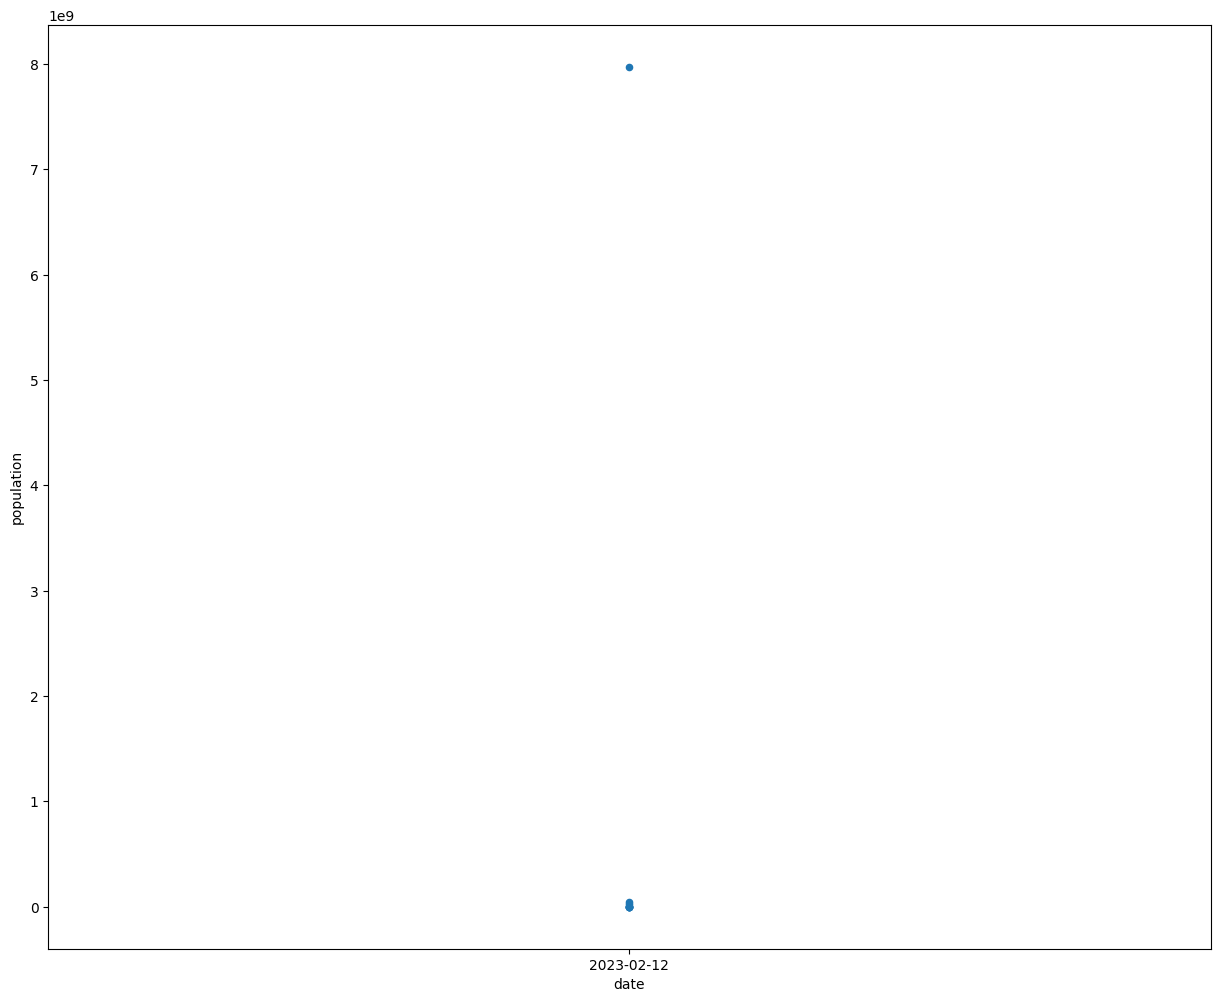

In [174]:
Main_Data[:10].plot.scatter(x='date',y='population')

<AxesSubplot: xlabel='date', ylabel='life_expectancy'>

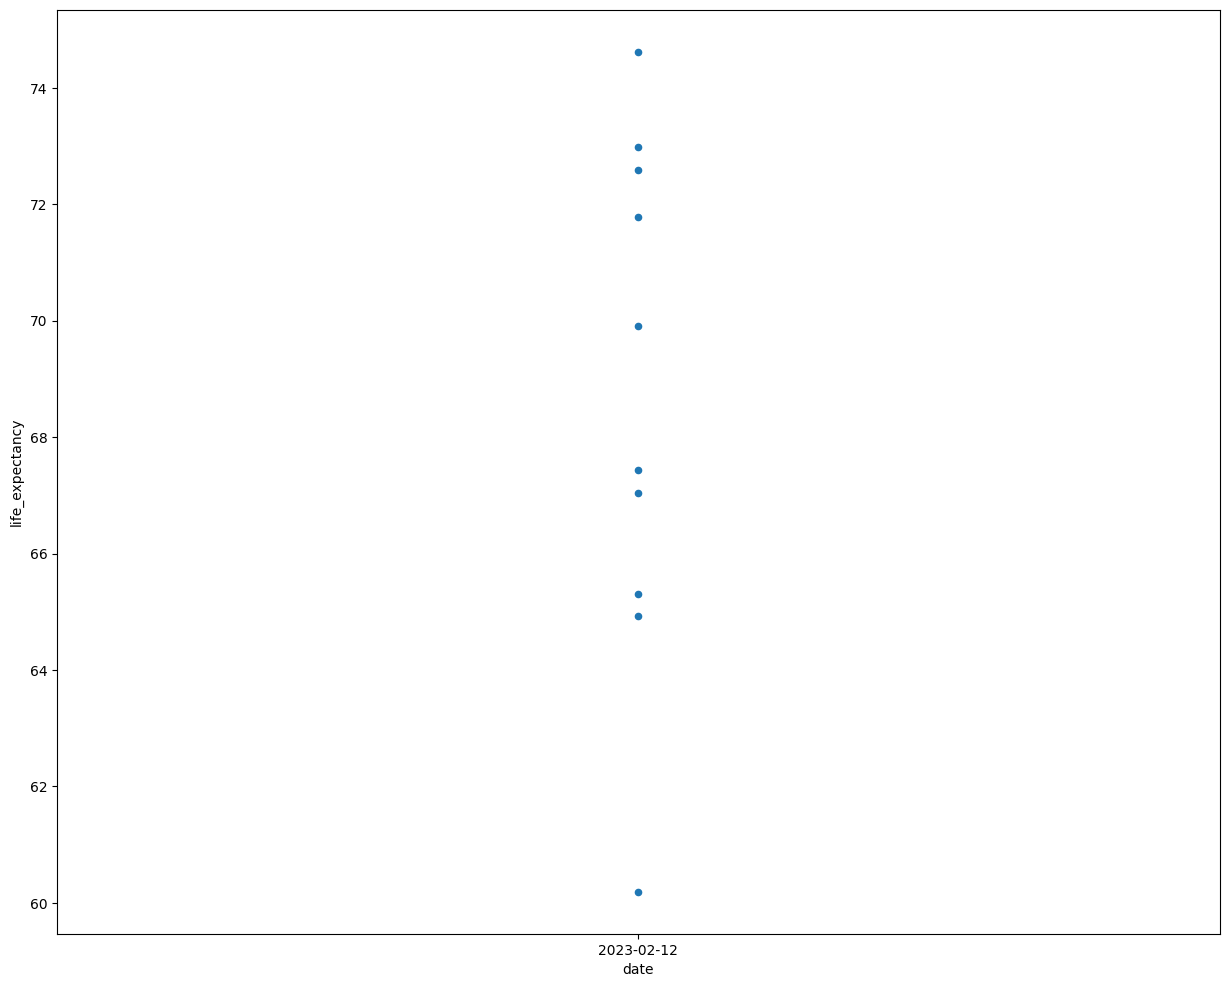

In [175]:
Main_Data[:10].plot.scatter(x='date',y='life_expectancy')

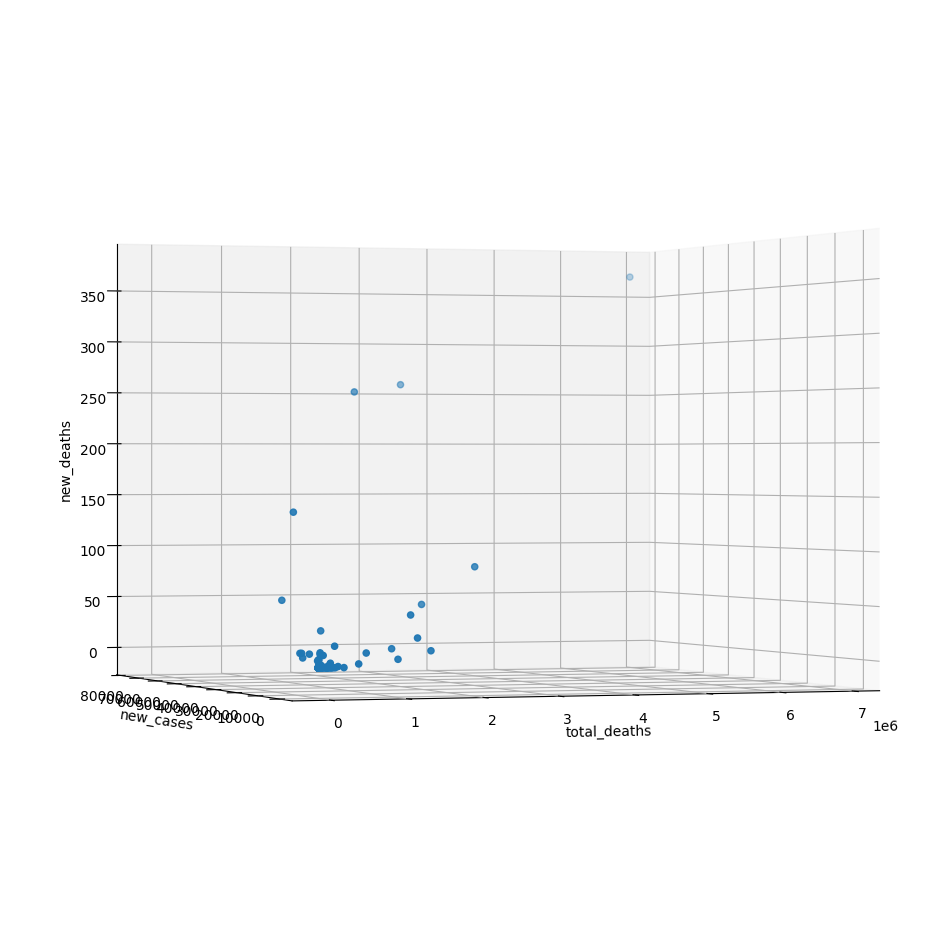

In [177]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(Main_Data['total_deaths'],Main_Data['new_cases'],Main_Data['new_deaths'])
plotter.set_xlabel('total_deaths')
plotter.set_ylabel('new_cases')
plotter.set_zlabel('new_deaths')
plotter.view_init(0, 250)

### Area charts

<AxesSubplot: >

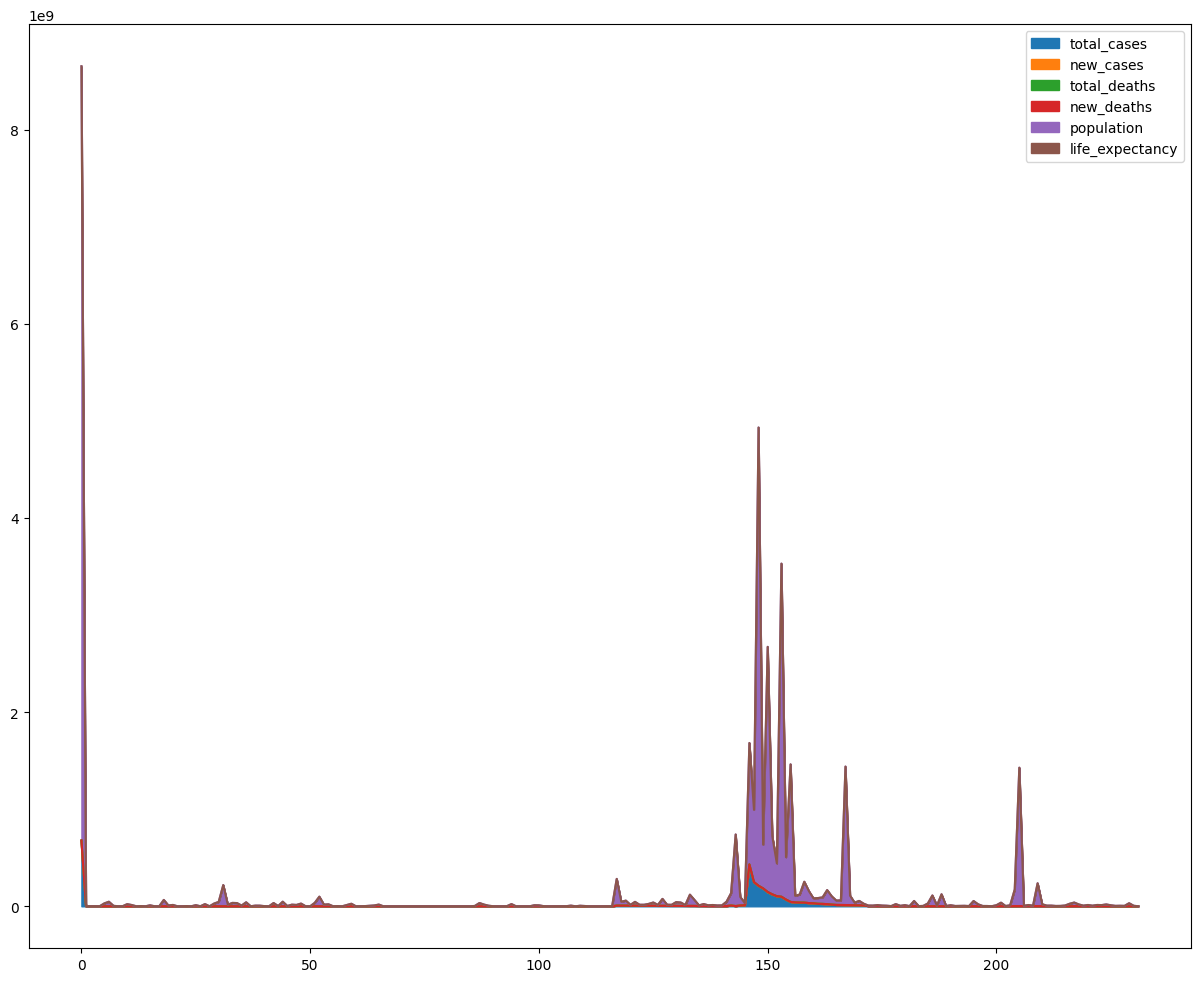

In [182]:
Main_Data.plot.area()

### Bar Charts

<AxesSubplot: xlabel='location'>

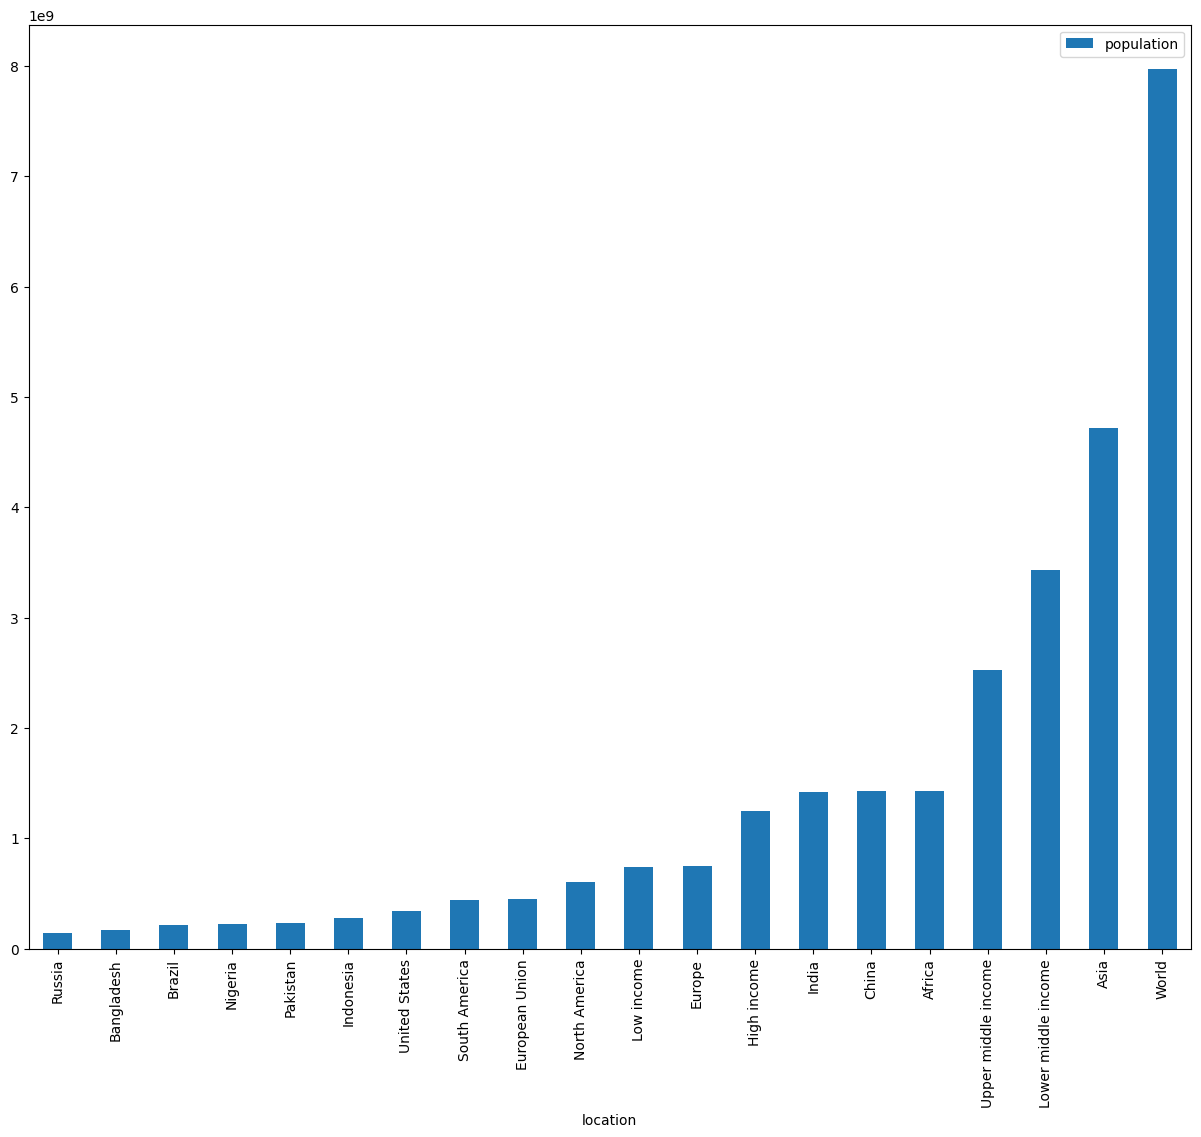

In [191]:
Main_Data.sort_values(by='population')[-20:].plot.bar(y='population',x='location')

<AxesSubplot: xlabel='location'>

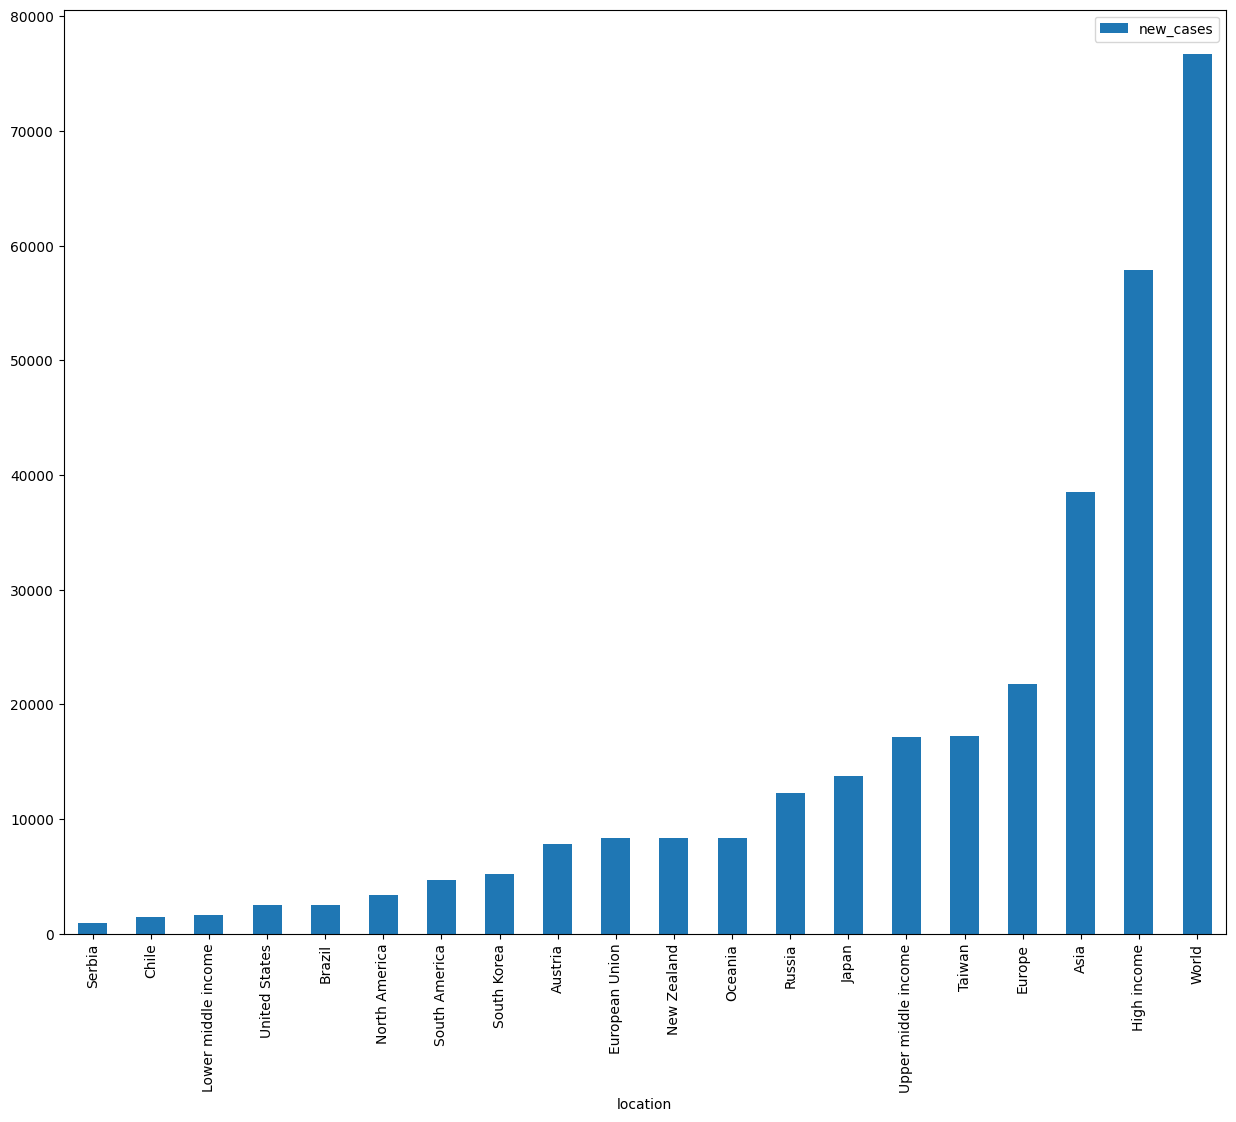

In [192]:
Main_Data.sort_values(by='new_cases')[-20:].plot.bar(y='new_cases',x='location')

### Histograms

(array([ 3.,  2.,  0.,  4.,  4.,  5.,  7.,  3., 12.,  5., 10.,  2.,  9.,
       13., 17., 20., 20., 22., 12., 15., 13., 18., 11.,  4.,  1.]), array([53.28  , 54.6188, 55.9576, 57.2964, 58.6352, 59.974 , 61.3128,
       62.6516, 63.9904, 65.3292, 66.668 , 68.0068, 69.3456, 70.6844,
       72.0232, 73.362 , 74.7008, 76.0396, 77.3784, 78.7172, 80.056 ,
       81.3948, 82.7336, 84.0724, 85.4112, 86.75  ]), <BarContainer object of 25 artists>)

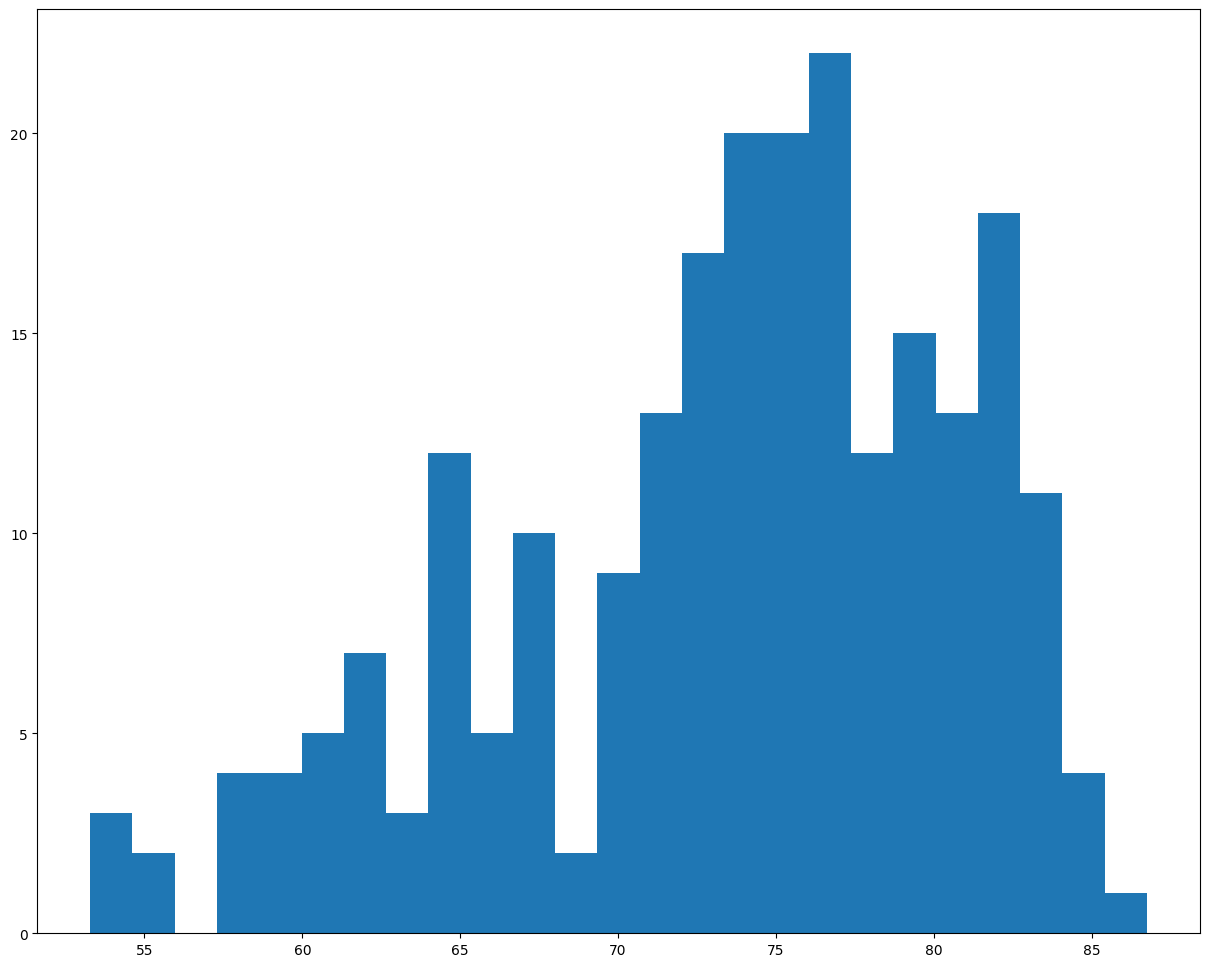

In [197]:
pyplot.hist(Main_Data['life_expectancy'],bins=25)

### Stem and Leaf Plot

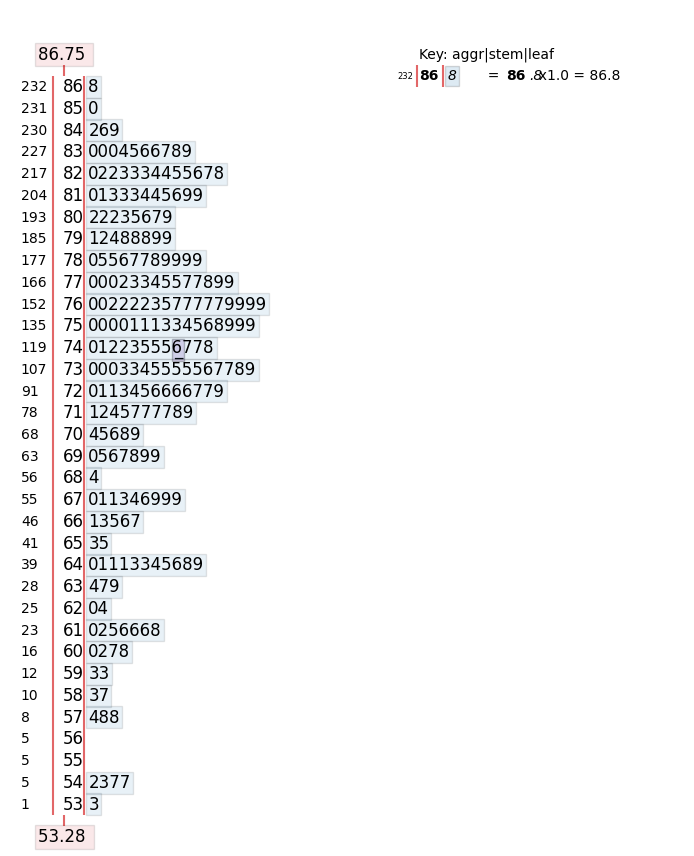

In [213]:
data=stemgraphic.stem_graphic(Main_Data['life_expectancy'])

<StemContainer object of 3 artists>

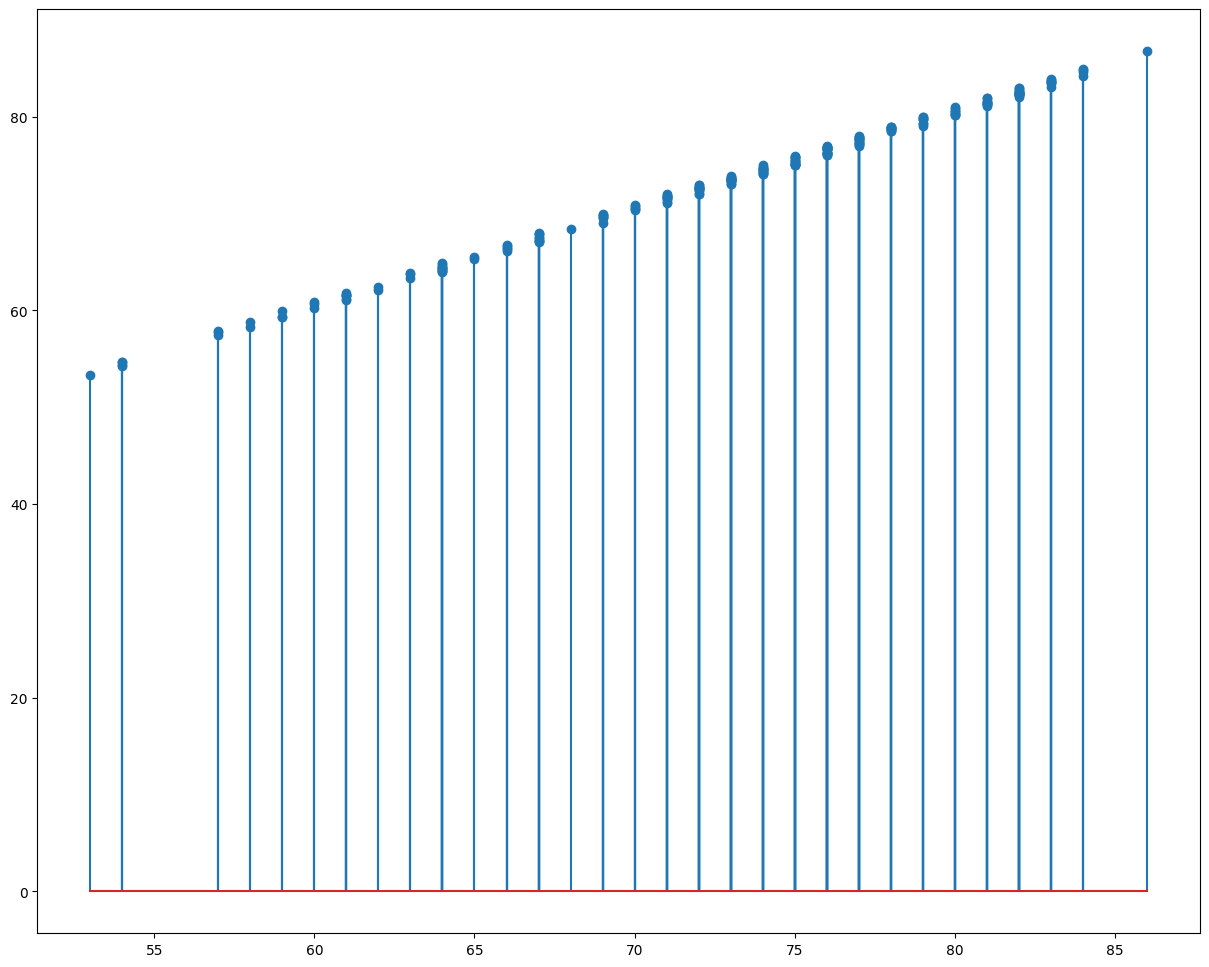

In [216]:
pyplot.stem(list((Main_Data['life_expectancy'].apply(lambda x:int(x)))),Main_Data['life_expectancy'])

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

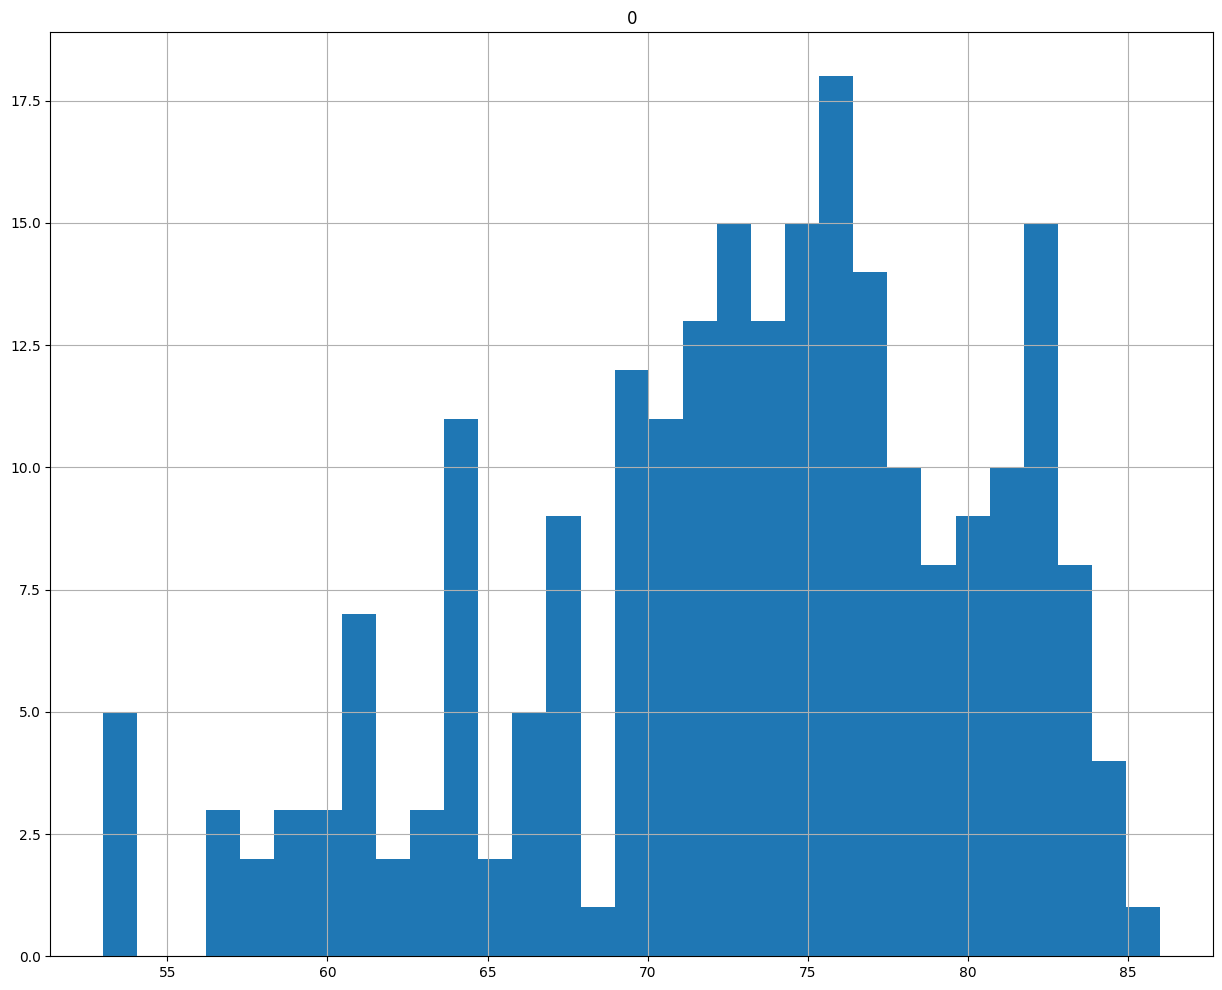

In [255]:
pandas.DataFrame(list((Main_Data['life_expectancy'].apply(lambda x:int(x))))).hist(bins=len(set(Main_Data['life_expectancy'].apply(lambda x:int(x)))))

## Extras

### Venn Diagrams

In [271]:
Main_Data['continent'].value_counts()

Africa           56
Asia             51
Europe           51
North America    35
Oceania          19
South America    14
Income Based      4
World             2
Name: continent, dtype: int64

In [272]:
Main_Data[Main_Data['continent']=='Income Based']

,iso_code,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,population,life_expectancy
143,OWID_LIC,2023-02-12,Income Based,Low income,2284294.0,45.0,47887.0,1.0,7.376049e+08,73.466519
146,OWID_HIC,2023-02-12,Income Based,High income,428947809.0,57908.0,2855457.0,257.0,1.250515e+09,73.466519
150,OWID_UMC,2023-02-12,Income Based,Upper middle income,144405197.0,17172.0,2604768.0,86.0,2.525921e+09,73.466519
153,OWID_LMC,2023-02-12,Income Based,Lower middle income,97116843.0,1621.0,1345503.0,25.0,3.432097e+09,73.466519


In [266]:
Main_Data

,iso_code,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,population,life_expectancy
143,OWID_LIC,2023-02-12,Income Based,Low income,2284294.0,45.0,47887.0,1.0,7.376049e+08,73.466519
146,OWID_HIC,2023-02-12,Income Based,High income,428947809.0,57908.0,2855457.0,257.0,1.250515e+09,73.466519
150,OWID_UMC,2023-02-12,Income Based,Upper middle income,144405197.0,17172.0,2604768.0,86.0,2.525921e+09,73.466519
153,OWID_LMC,2023-02-12,Income Based,Lower middle income,97116843.0,1621.0,1345503.0,25.0,3.432097e+09,73.466519


### Network Graph

### Radar Chart

In [358]:
Radar_Graph_Data=Main_Data[['population','continent',"total_cases","total_deaths"]].groupby("continent").sum()
Radar_Graph_Data['continent']=Main_Data[['population','continent',"total_cases","total_deaths"]].groupby("continent").sum().index

In [359]:
Radar_Graph_Data

,population,total_cases,total_deaths,continent
continent,,,,
World,8.916167e+12,3.000008e+11,4.247900e+09,World


In [372]:
Radar_Graph_Data=Main_Data[['population','date',"new_cases","new_deaths"]]
Radar_Graph_Data['new_cases']=Radar_Graph_Data['new_cases'].apply(lambda x:int(x))
Radar_Graph_Data['date']=Radar_Graph_Data['date'].apply(lambda x:str(x))

In [373]:
Radar_Graph_Data

,population,date,new_cases,new_deaths
0,7.975105e+09,2020-01-22,0,0.0
1,7.975105e+09,2020-01-23,100,1.0
2,7.975105e+09,2020-01-24,287,8.0
3,7.975105e+09,2020-01-25,493,16.0
4,7.975105e+09,2020-01-26,683,14.0
...,...,...,...,...
1113,7.975105e+09,2023-02-08,228269,1896.0
1114,7.975105e+09,2023-02-09,257000,2259.0
1115,7.975105e+09,2023-02-10,142758,1422.0
1116,7.975105e+09,2023-02-11,131483,622.0


In [368]:
Radar_Graph_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  1118 non-null   float64
 1   date        1118 non-null   object 
 2   new_cases   1118 non-null   int64  
 3   new_deaths  1118 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 35.1+ KB


In [379]:
Radar_Chart=radar_graph_object.Figure()
Radar_Chart.add_trace(
    radar_graph_object.Scatterpolar(
        r=Radar_Graph_Data['new_deaths'],
        fill='toself',
        name='Poputation'
    )
)
Radar_Chart.add_trace(
    radar_graph_object.Scatterpolar(
        r=Radar_Graph_Data['new_cases'],
        fill='toself',
        name='Poputation'
    )
)


In [371]:
express.line_polar(Radar_Graph_Data,r=Radar_Graph_Data['new_cases']).update_traces(fill='toself')

### Geographical Maps

## Tree Maps

<AxesSubplot: >

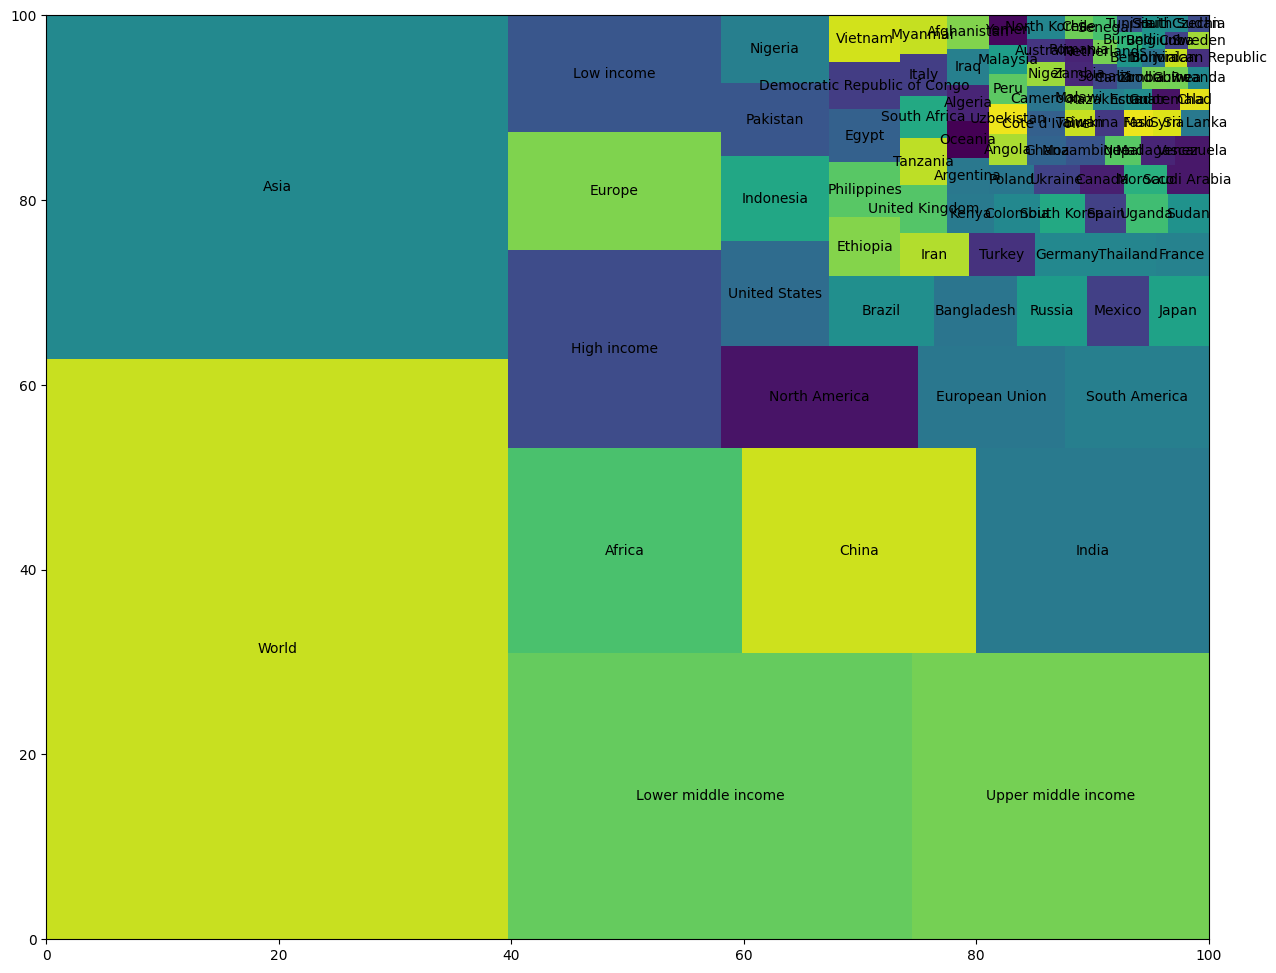

In [285]:
squarify.plot( sizes=Main_Data[['location','population']].sort_values(by='population',ascending=False)['population'][:100],
    label=Main_Data[['location','population']].sort_values(by='population',ascending=False)['location'][:100]
)

<AxesSubplot: >

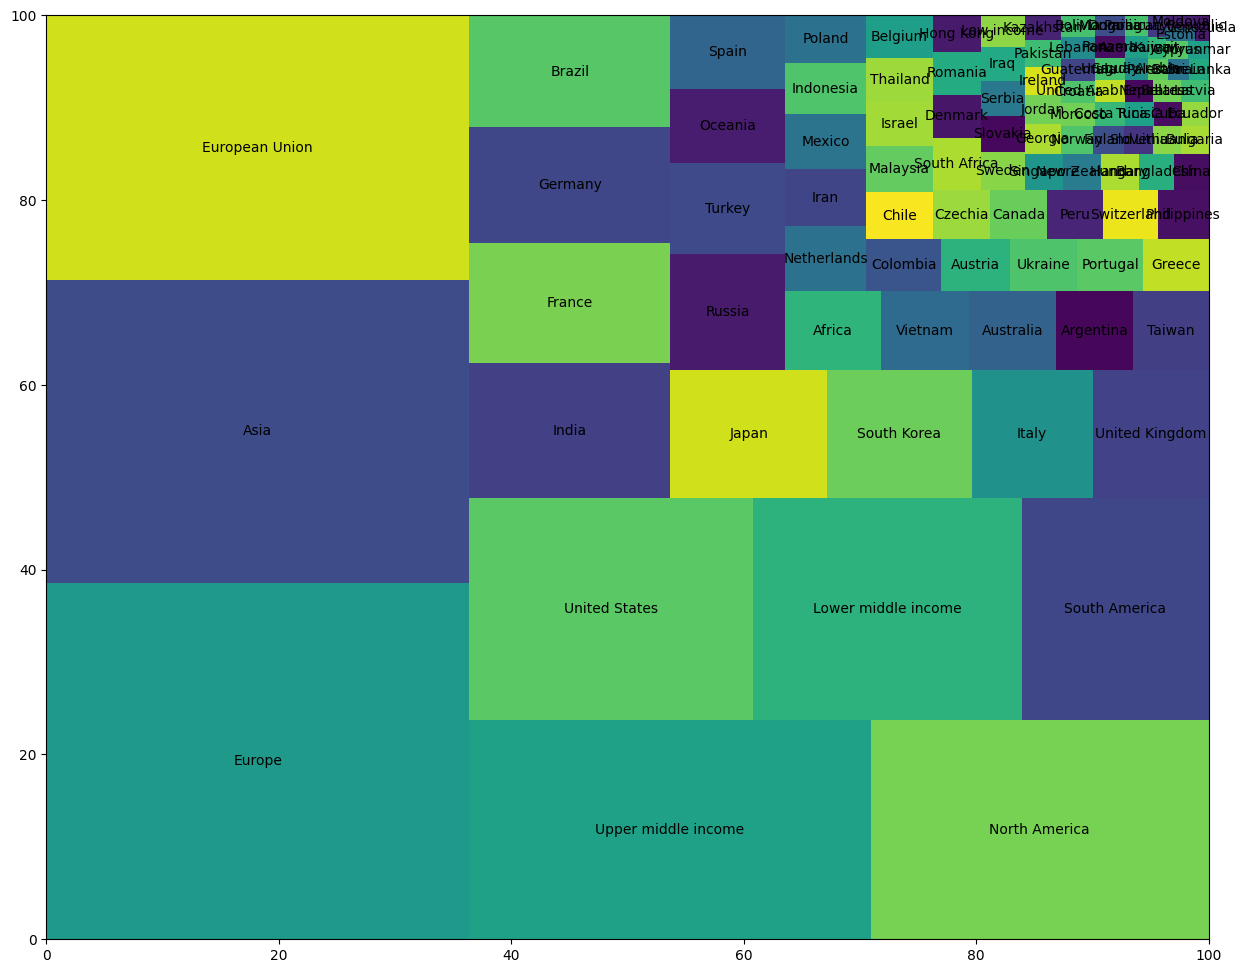

In [287]:
squarify.plot( sizes=Main_Data[['location','total_cases']].sort_values(by='total_cases',ascending=False)['total_cases'][2:100],
    label=Main_Data[['location','total_cases']].sort_values(by='total_cases',ascending=False)['location'][2:100]
)

# References

###### Other Data Resources:
https://www.kaggle.com/datasets/nehaprabhavalkar/india-gis-data